In [1]:
pip install missingno -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Импортируем библиотек**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats
from IPython.display import display

import missingno as msno

## **Шаг 1.** Изучение данных

### Считаем CSV-файл с данными

In [3]:
data = pd.read_csv('C:/Я.Практикум/проекты/2_сборный/games.csv')

### Изучим данные

In [4]:
def screen (data):
    return data.info(), display(data.head())

screen (data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


(None, None)

Размер: 
* 16715 строк, 11 столбцов

Типы:
* object - 5
* float - 6

В 6 из 11 столбцов количество строк ниже количества строк всей таблицы - есть пропуски.

В датасете представлены данные о: 
* названии игры, платформе и дате выпуска, 
* жанре, 
* продажах (млн проданных копий: Северная Америна, Европа, Япония, другие страны), 
* оценках критиков и пользователей и рейтинге, присваивающем играм возрастную категорию.

**Построим гистограммы для всех числовых столбцов таблицы:**

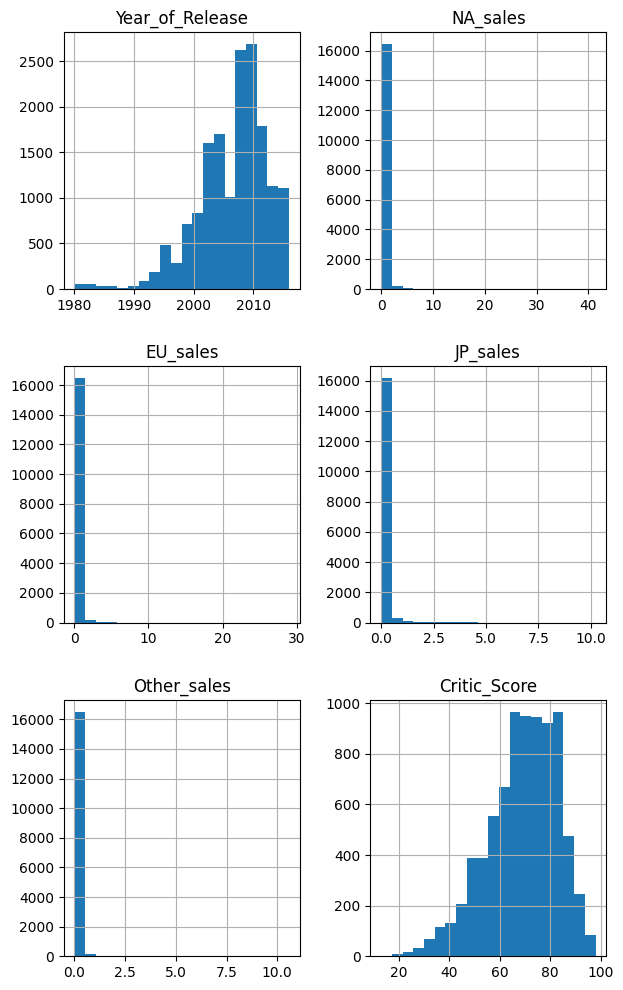

In [5]:
data.hist(bins=20, figsize=(7, 12))
plt.show()

6 гистограмм

* Год релиза: с 1980 по 2016  
* Оценки критиков: от 0 до 100  
* Продажи: в основном до 5 млн шт.

### **Вывод по 1 разделу**

Имеем датафрейм:
* Размер: 16715 строк, 11 столбцов.  
* Типы: 5 object, 6 float.

Данные по платформе и дате релиза каждой игры, продажам в разных странах и рейтингам.



## **Шаг 2.** Подготовка данных

### Приведем названия столбцов к нижнему регистру

Изначальные названия столбцов:

In [6]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Преобразуем методом str.lower():

In [7]:
data.columns = data.columns.str.lower()

# Выводим на экран результат:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

* **Теперь наименования всех строк содержат английские буквы только нижнего регистра.  
Это облегчит работу с данными и минимизирует ошибки в названиях столбцов.**

### Преобразование данных в нужные типы

Еще раз вызовем метод data.info(), чтобы посмотреть типы данных по разным столбцам, и выведем на экран строки датафрейма:

In [8]:
screen (data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


(None, None)

Целесообразно заменить на тип int данные в целочисленных столбцах:  
* year_of_release

Тип object заменим на float в следующих столбцах:  
* user_score

**1. year_of_release:**

Выведем уникальные значения и проверим, нет ли ненулевых знаков после запятой:

In [9]:
print (data['year_of_release'].unique())

# Убедимся, что нет значений, в которых есть ненулевые знаки после запятой:
# для суммы уникальных значений, кроме пропущенных, выводим знаки после запятой:
data.loc[data['year_of_release'].isna() == False, 'year_of_release'].unique().sum()%1

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


0.0

* Значения целочисленные.

Заменим тип на int:

In [10]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

Проверяем результат замены:

In [11]:
print (data['year_of_release'].dtype)

Int64


**2. user_score:**

Выведем тип, уникальные значения и их количество:

In [12]:
print ('Тип:', data['user_score'].dtype)
print ('Количество уникальных значений до обработки:', data['user_score'].nunique())
data['user_score'].unique()

Тип: object
Количество уникальных значений до обработки: 96


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

* Есть необычное значение - 'tbd'

Выведем первые пять строк данных, в которых в столбце `user_score` указано 'tbd':

In [13]:
data.loc[data['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


* Явных закономерностей и связей с другими параметрами не наблюдается.  

Вероятно, 'tbd' расшифровывается как "to be defined" - то есть оценка еще не определена, возможно, недостаточно оценок для определения средней. 

**Будет уместно заменить значение 'tbd' на 'nan', поскольку оба значения показывают, что параметр для строки неопределен.**

Заменим тип столбца `user_score` на *float* с помощью метода to_numeric, заменив значения 'tbd' на 'nan':

In [14]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')

Проверяем новый тип столбца `user_score` и оставшиеся уникальные значения:

In [15]:
print ('Тип:', data['user_score'].dtype)
print ('Количество уникальных значений после обработки:', data['user_score'].nunique())
data['user_score'].unique()

Тип: float64
Количество уникальных значений после обработки: 95


array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

* Тип изменен, значения 'tbd' заменены на 'nan'

**Итог замены типов данных:**

Заменили:  
1. `year_of_release` - float на Int
2. `user_score` - object на float

data.info() после замены:

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Обработка пропусков

Посчитаем количество пропусков в разных столбцах:

In [17]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Визуализируем пропуски с помощью матрицы:

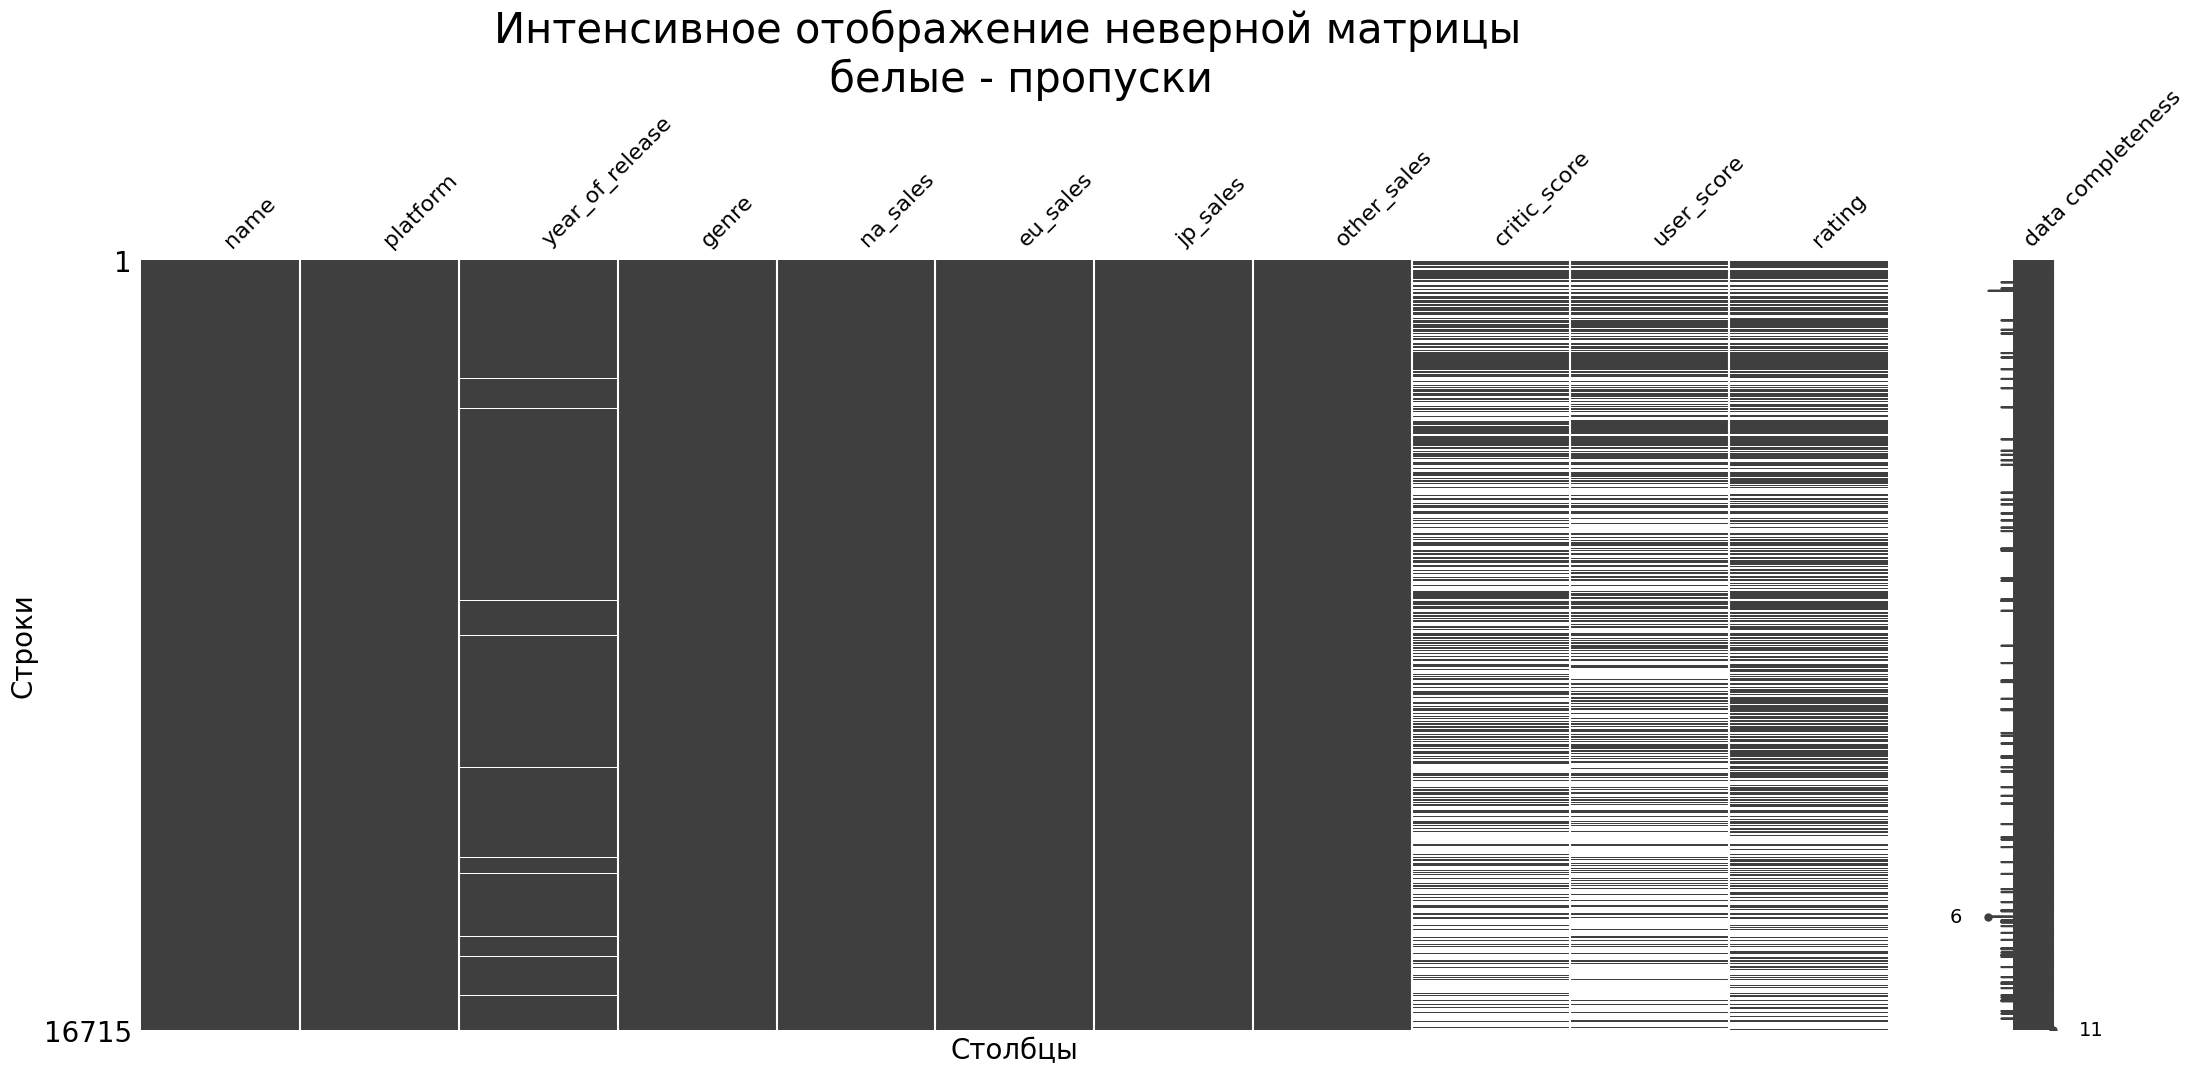

In [18]:
msno.matrix(data, labels=True)

plt.title('Интенсивное отображение неверной матрицы \n белые - пропуски', fontsize=30, pad=15)
plt.xlabel('Столбцы', size = 20)
plt.ylabel('Строки', size = 20)
plt.show()

Пропуски преимущественно в: 
* `critic_score` - 8578, 
* `user_score` - 6701, 
* `rating` - 6766.


2 пропуска в столбце `name`   
269 - `year_of_release`

Посмотрим корреляцию тепловых карт:

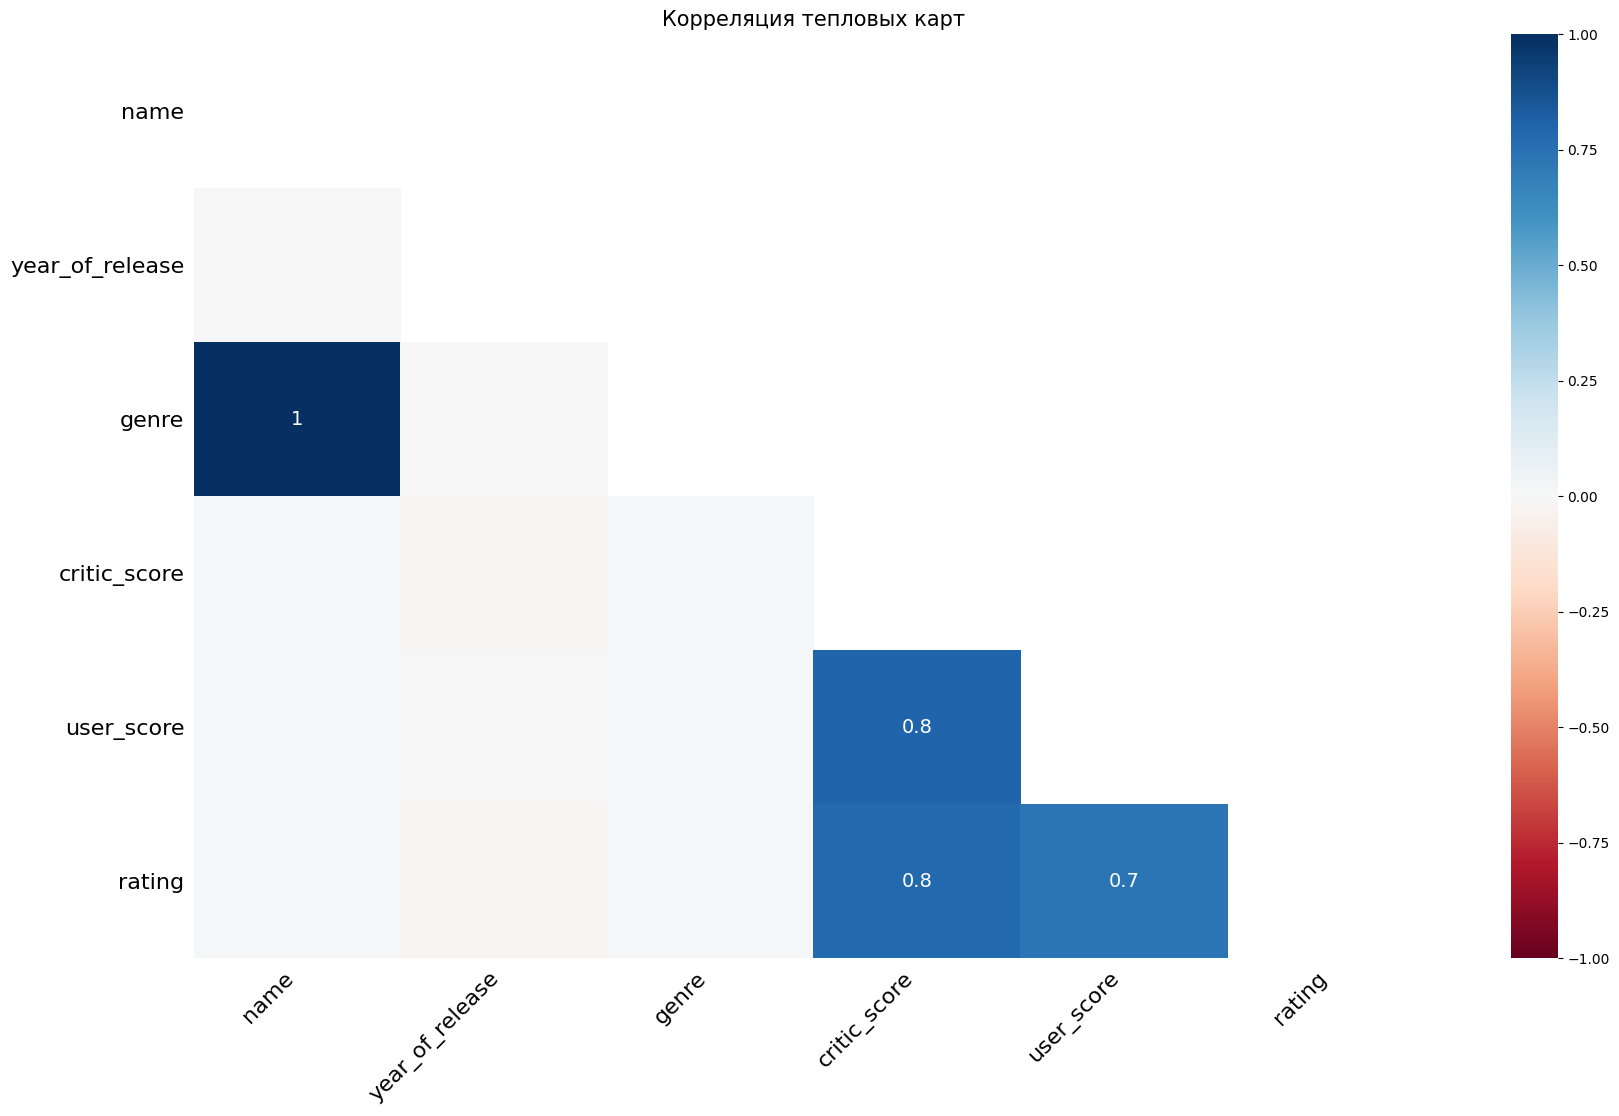

In [19]:
msno.heatmap(data)
plt.title('Корреляция тепловых карт', fontsize = 15)
plt.show()

* Видим довольно сильную корреляцию между значениями `critic_score` и `user_score`

##### name

Причина пропусков: 
* Вероятно, пропуски вызваны ошибкой при формировании, выгрузке данных.

Пропуски в данном столбце обработать не сможем, определить название игры по другим имеющимся параметрам невозможно.   
Оставляем их.

##### year_of_release

Причина пропусков: 
* Вероятно, пропуски вызваны ошибкой при формировании, выгрузке данных.

Также вряд ли можно обработать пропуски.  
Оставляем их.

##### rating

Причина пропусков: 
* Возрастная категория может быть еще не присвоена для некоторых игр.  


По информации из википедии узнаем, что первоначально рейтинг E назывался K-A.  

**1.** Произведем замену рейтингов K-A на E:

In [20]:
data['rating'] = data['rating'].replace('K-A', 'E')

Посмотрим количество категорий после замены:

In [21]:
data['rating'].value_counts()

E       3993
T       2961
M       1563
E10+    1420
EC         8
RP         3
AO         1
Name: rating, dtype: int64

* Убрали лишнюю категорию.

По другим имеющимся параметрам не сможем определить возрастную категорию игры.  

В списке рейтингов есть RP - "Рейтинг ожидается".   
(*Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.*)

Вероятно, для многих игр с пропущенными значениями рейтинг просто еще не был присвоен.  

Проверим, какие годы преимущественно встречаются в наших пропусках:

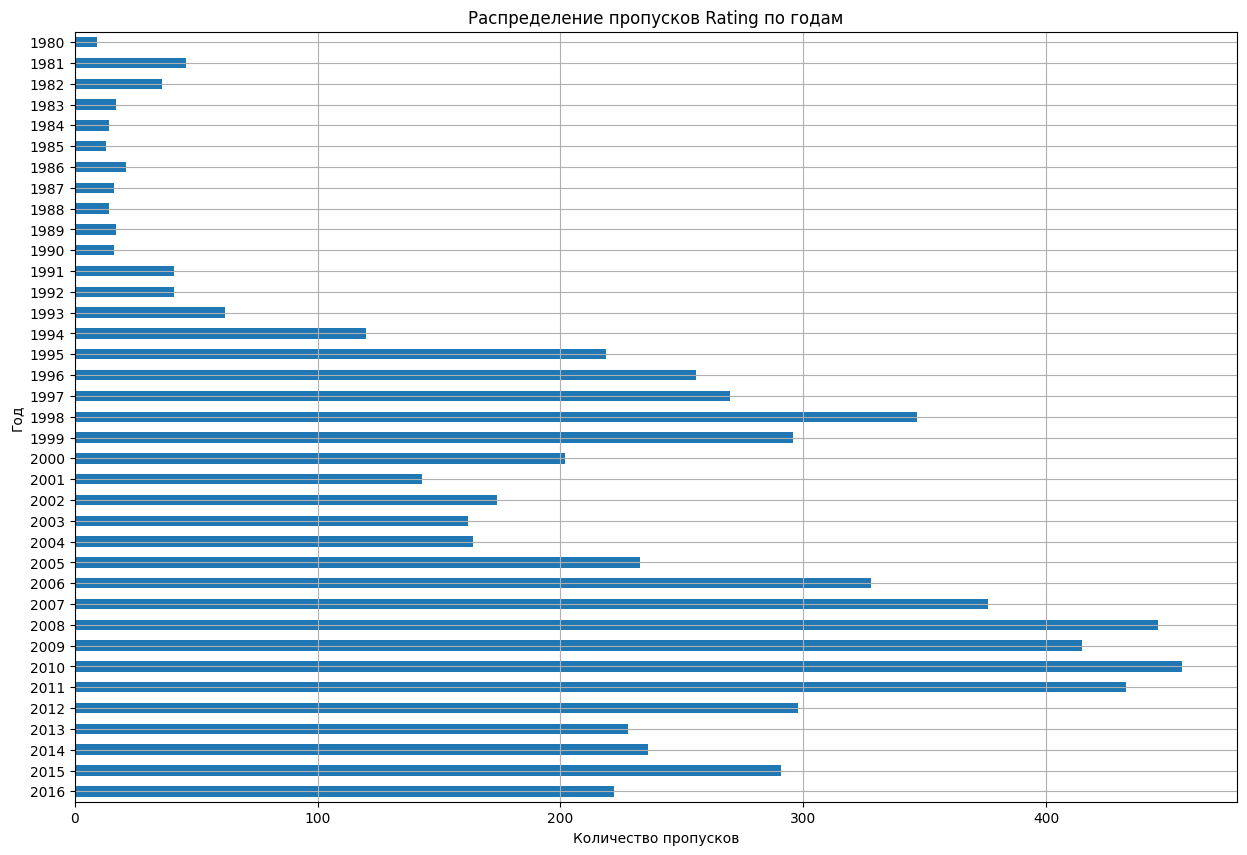

In [22]:
(data.loc[data['rating'].isna(), 'year_of_release'].value_counts().sort_index(ascending=False)
 .plot.barh(figsize=(15, 10), grid=True))


plt.title('Распределение пропусков Rating по годам')
plt.xlabel('Количество пропусков')
plt.ylabel('Год')
plt.show()

* Поскольку довольно большое количество пропусков встречаются разные годы, вряд ли можно присваивать им рейтинг RP - "Рейтинг ожидается".

**2.** Заменим пропуски на значение "undefined", чтобы в дальнейшем учитывать эти строки при анализе данных.


In [23]:
data['rating'] = data['rating'].fillna('undefined')
data['rating'].value_counts()

undefined    6766
E            3993
T            2961
M            1563
E10+         1420
EC              8
RP              3
AO              1
Name: rating, dtype: int64

**critic_score и user_score** 

Причины пропусков: 

Возможно, оценка еще не определена, недостаточно оценок для определения средней.

Хорошим вариантом будет для каждого столбца заменить пропуск на подходящее значение, отталкиваясь от значения второго столбца.

Определим отношение `critic_score` к `user_score`:

In [24]:
print ((data['critic_score'] / data['user_score']).describe())

count    7017.000000
mean       10.107999
std         3.169620
min         3.033708
25%         8.764045
50%         9.750000
75%        10.759494
max       120.000000
dtype: float64


* В половине случаев оценка критиков выше оценки пользователей в 8.76 - 10.76 раз.  
Медианное - 9.75

Поскольку в столбце `critic_score` имеем только целочисленные значения (нет ненулевых значений после запятой), будем использовать коэффициент 10. 

##### critic_score

Заменим пропуски в этом столбце на значение из `user_score`, домножив его на 10 :

In [25]:
data['critic_score'] = data['critic_score'].fillna(data['user_score'] * 10)

Количество пропусков после обработки:

In [26]:
data['critic_score'].isna().sum()

8005

##### user_score

Заменяем значениями из `critic_score`, разделив на 10:

In [27]:
data['user_score'] = data['user_score'].fillna(data['critic_score'] * 0.1)

Количество пропусков после обработки:

In [28]:
data['user_score'].isna().sum()

8005

____
#####  user_score, critic_score : Чем еще можно было бы заменить пропуски

Пропуски в этих столбцах можно было бы заменить на медианное значение оценок для соответствующих групп: 
* по платформе, жанру и дате релиза

Выглядела бы группировка так:

In [29]:
data.groupby(['platform', 'genre', 'year_of_release'])[['user_score', 'critic_score']].median()

user_score  critic_score
platform genre    year_of_release                          
2600     Action   1980                    NaN           NaN
                  1981                    NaN           NaN
                  1982                    NaN           NaN
                  1983                    NaN           NaN
                  1987                    NaN           NaN
...                                       ...           ...
XOne     Sports   2015                   5.60          72.0
                  2016                   6.05          80.0
         Strategy 2013                   6.90          53.0
                  2015                    NaN           NaN
                  2016                   8.10          87.0

[1809 rows x 2 columns]

Тем не менее, данный вариант заполнения пропусков был бы не совсем корректен и мог бы сильно исказить наши значения, т.к. значений, по которым берутся медианы, почти такое же количество, как и пропусков.


Также медианы могут исказить значения, т.к. для разных групп могут быть достаточно большие разбросы по оценкам.

Например, для игр на платформе PS3 в жанре Sports по 2015 году имеем 7 строк, при этом достаточно большой межквартильный размах:
- 34.5 и 3.45 по `critic_score` и `user_score` соответственно

In [30]:
data.query('platform == "PS3" and genre == "Sports" and year_of_release == 2015')[['user_score', 'critic_score']].describe()

,user_score,critic_score
count,7.000000,7.000000
mean,5.057143,50.571429
std,2.108599,21.085992
min,3.100000,31.000000
25%,3.150000,31.500000
50%,4.600000,46.000000
75%,6.600000,66.000000
max,8.200000,82.000000


**В связи с этим примем решение оставить пропуски.**
_____

### Проверка дубликатов

**1. Явные дубликаты:**

In [31]:
data.duplicated().sum()

0

* Отсутствуют

**2. Неявные дубликаты**

**1.** Могут быть скрыты в `platform`:

In [32]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

* Повторяющиеся значения отсутствуют

**2.** Проверим наличие неявных дубликатов по ключевым столбцам [`year_of_release`, `name`, `platform`] :

In [33]:
data[data.duplicated(subset=['year_of_release', 'name', 'platform'], keep='first')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993,NaN,0.0,0.00,0.03,0.0,NaN,NaN,undefined
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


Количество строк датасета до удаления неявных дубликатов:

In [34]:
len(data)

16715

Удалим неявные дубликаты:

In [35]:
data = data.drop_duplicates(subset=['year_of_release', 'name', 'platform'], keep='first')

Количество строк датасета после удаления неявных дубликатов:

In [36]:
len(data)

16713

In [37]:
# check
def function(x):
    return x.str.lower()

In [38]:
# check
data.select_dtypes(include=['object']).apply(function).join(data[['year_of_release']])[:2]

,name,platform,genre,rating,year_of_release
0,wii sports,wii,sports,e,2006
1,super mario bros.,nes,platform,undefined,1985


### Столбец - Сумма продаж по всем регионам

Создадим этот столбец как сумму продаж по `na_sales`, `eu_sales`, `jp_sales` и `other_sales`:

In [39]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


### **Вывод по 2 разделу**

На данном этапе проведена подготовка данных:

1. Названия столбцов приведены к нижнему регистру
2. Столбцы `year_of_release` и `user_score` приведены к типам int и float соответственно
3. Частично обработаны пропуски для `critic_score` и `user_score`

## **Шаг 3.** Исследовательский анализ данных

### Количество игр по годам

Посчитаем количества выпущенных игр по годам:

In [40]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Визуализируем данные:

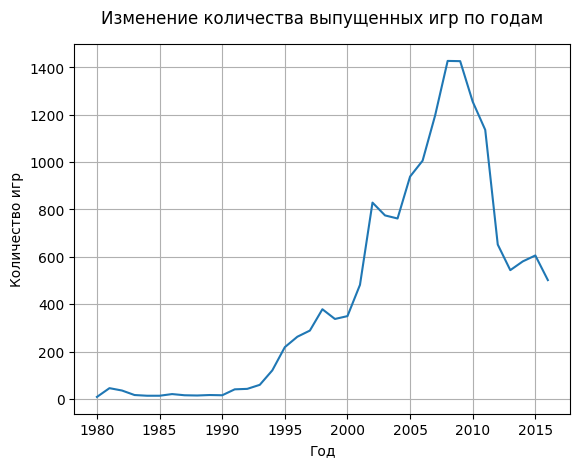

In [41]:
data.groupby('year_of_release')['name'].count().plot(x='year_of_release', grid=True)

# Подпись графика и осей:
plt.title('Изменение количества выпущенных игр по годам', pad=15)
plt.xlabel('Год')
plt.ylabel('Количество игр')

plt.show()

Видим, что производство игр:   
* начало резко возрастать примерно с 1995 года, выйдя на пик к 2007-2008 годам (около 1400 шт);  
* показало значительный спад с 2012 года (почти в два раза меньше, если сравнивать с 2011);
* с 2012 по 2016 год видим примерно одинаковый уровень производства игр - 500-650 шт в год.

Для дальнейшей оценки стоит брать период после 2011 года, поскольку явно выраженный пик производства игр был пройден в 2005-2011 годах.

### Изменение продаж по платформам

Посмотрим суммарные продажи за все годы по каждой платформе:

In [42]:
data_platforms_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
data_platforms_sales

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.64
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Построим графики распределения суммарных продаж по годам для 5 наиболее популярных платформ:

1. Сделаем сводную таблицу с продажами по годам для 5 самых продаваемых платформ:

In [43]:
data.loc[data['platform'].isin(data_platforms_sales[0:5]['platform'])].pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').head()

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
1985,0.02,NaN,NaN,NaN,NaN
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN


DS (Nintendo DS), была выпущена в 2004, но по ней видим продажи в 1985.

Проверим продажи DS до 2004 года:

In [44]:
data.query('platform == "DS" and year_of_release < 2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,undefined,0.02


Странный выброс.  
Возможно, изначально игра была выпущена в 1985, и после перевыпущена на DS после его появления в двухтысячных, а год ошибочно указан старый.  

Стоит удалить.

Удалим строку из исходной таблицы, сводную таблицу построим заново по обновленным значениям^

In [45]:
# Удаляем выброс
data = data.drop(index=[15957])

In [46]:
platform_sales_per_year_top5 = (
    data.loc[data['platform'].isin(data_platforms_sales[0:5]['platform'])]
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'))

platform_sales_per_year_top5.tail()

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
2012,11.01,NaN,107.35,21.71,99.74
2013,1.54,NaN,113.25,8.59,88.58
2014,NaN,NaN,47.76,3.75,34.74
2015,NaN,NaN,16.82,1.14,11.96
2016,NaN,NaN,3.60,0.18,1.52


2. По этой таблице построим график:

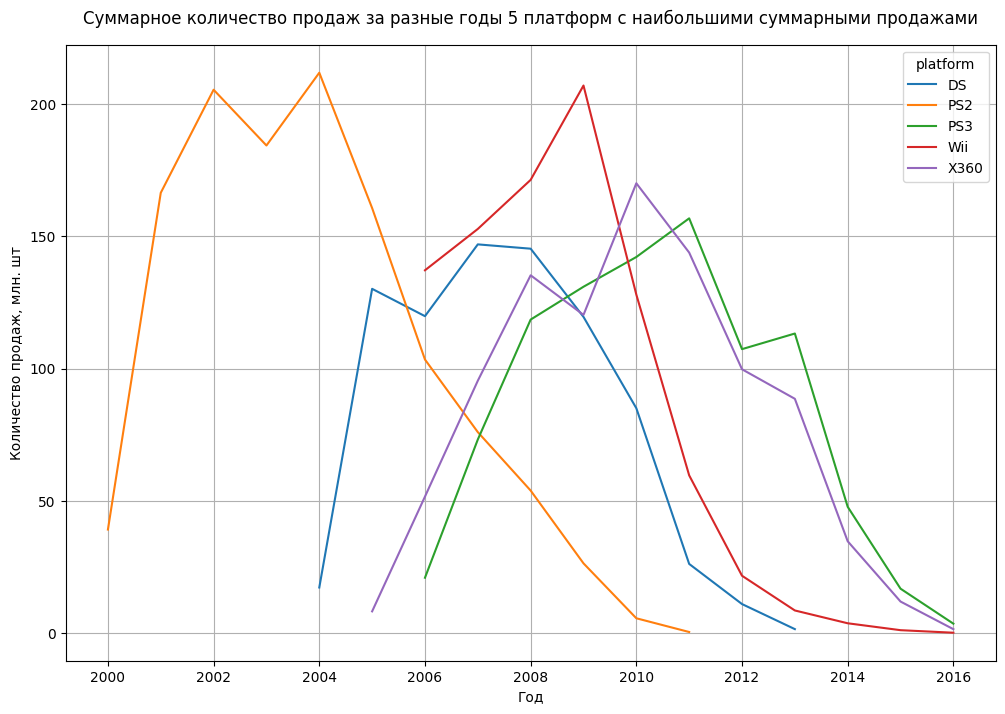

In [47]:
platform_sales_per_year_top5.plot(figsize=(12, 8), grid=True)

plt.title('Суммарное количество продаж за разные годы 5 платформ с наибольшими суммарными продажами', pad=15)
plt.xlabel('Год')
plt.ylabel('Количество продаж, млн. шт')
plt.show()

И для 10 наиболее популярных:

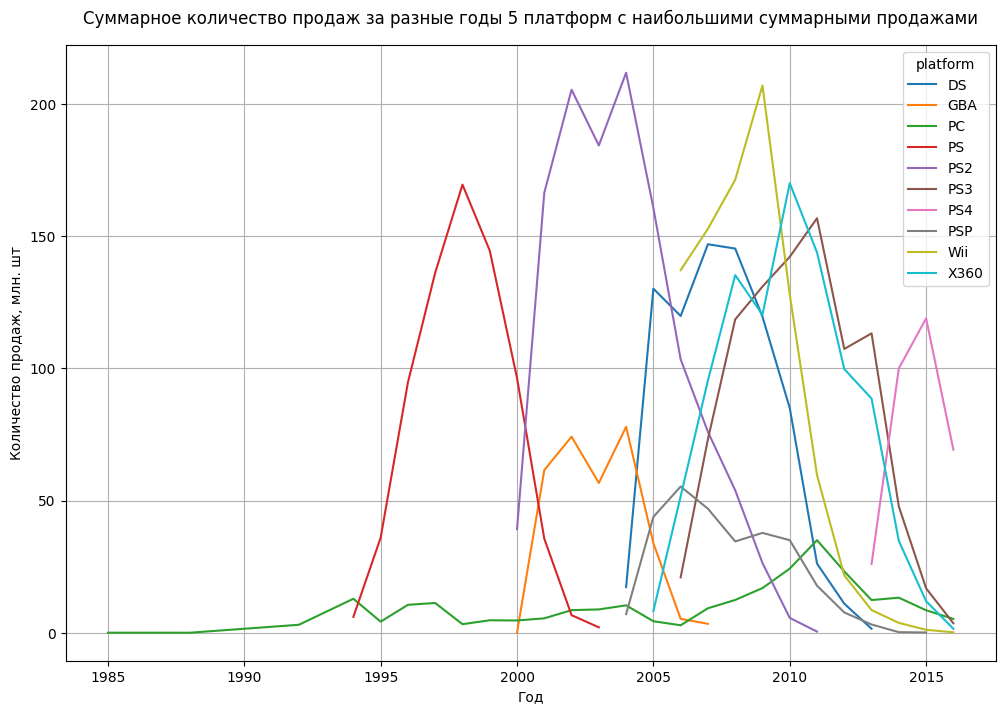

In [48]:
# Создадим сводную таблицу для 10 самых продаваемых платформ
platform_sales_per_year_top10 = data.loc[data['platform'].isin(data_platforms_sales[0:10]['platform'])].pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Строим график:
platform_sales_per_year_top10.plot(figsize=(12, 8), grid=True)

plt.title('Суммарное количество продаж за разные годы 5 платформ с наибольшими суммарными продажами', pad=15)
plt.xlabel('Год')
plt.ylabel('Количество продаж, млн. шт')
plt.show()

* По графикам видно, что платформы **от появления до исчезновения** платформы (от резкого роста до падения продаж) проходит около **10 лет**.      
 * В некоторых случаях этот срок сокращается до 5 лет либо растягивается с 1985 по 2016 (для PC).

* Видим **появление новых платформ** примерно **раз в 6 лет**: 
 1. 1994: PS
 2. 2000: PS2 и GBA (её продажи значительно ниже, чем PS2)
 3. 2004-2006: X360, PSP (относительно невысокие продажи), DS, PS3
 4. 2013: PS4  

* Среди 10 платформ с наибольшими суммарными продажами **сейчас переживает пик продаж платформа PS4**.

* PS4 начала продажи примерно в 2013, вышла на пик продаж в 2015

**Вероятно, по состоянию на 2016 год PS4 является самой популярной платформой.**

Проверим по продажам 2016 года:

In [49]:
data.query('year_of_release == 2016').groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64

* всё так.

**Итог:**

Наблюдения:
1. от появления до "исчезновения" платформы проходит 10 лет;
2. новые платформы появляются примерно раз в 6 лет;
3. пик продаж переживает PS4 - с 2013 года.

### Определение актуального периода

Для дальнейшего анализа данных возьмем **период с 2013 года включительно**.    

Причины:
1. Производство игр после пика 2006-2011 годов значительно сократилось с 2012 года и с тех пор имеет примерно одинаковый уровень в 500-650 шт в год  (определили в 3.1)
2. Появление новой платформы PS4 и её выход на пик продаж началось с 2013 года (определили в 3.2)

Создадим новый датафрейм с данными с 2013 года:

In [50]:
data_actual = data.query('year_of_release >= 2013')

# Проверяем, что в датафрейме данные только по интересующему нас периоду
data_actual['year_of_release'].unique()

<IntegerArray>
[2013, 2015, 2014, 2016]
Length: 4, dtype: Int64

### Определение потенциально прибыльных платформ

Определим суммарные продажи платформ за все годы, начиная с 2013:

In [51]:
data_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

* Явно лидирует PS4 - 314 млн
* PS3, XOne, 3DS, X360 - более 100 млн суммарных продаж у каждой

Построим сводную таблицу с данными по суммарным годовым продажам платформ за рассматриваемый период и для каждой платформы посчитаем, во сколько раз упали/увеличились продажи с 2013 года по 2015 (т.к. данные за 2016 могут быть неполными):

In [52]:
# Строим таблицу
data_actual_per_year = (data_actual
                        .pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum'))
data_actual_per_year.columns = ['2013', '2014', '2015', '2016']

# Считаем падение и рост продаж 13-15
data_actual_per_year['decline'] = data_actual_per_year['2013'] / data_actual_per_year['2015']
data_actual_per_year['growth'] = data_actual_per_year['2015'] / data_actual_per_year['2013']
data_actual_per_year.sort_values(by='decline')

,2013,2014,2015,2016,decline,growth
platform,,,,,,
PS4,25.99,100.00,118.90,69.25,0.218587,4.574836
XOne,18.96,54.07,60.14,26.15,0.315264,3.171941
WiiU,21.65,22.03,16.35,4.60,1.324159,0.755196
PC,12.38,13.28,8.52,5.25,1.453052,0.688207
PSV,10.59,11.90,6.25,4.25,1.694400,0.590179
3DS,56.57,43.76,27.78,15.14,2.036357,0.491073
PS3,113.25,47.76,16.82,3.60,6.733056,0.148521
X360,88.58,34.74,11.96,1.52,7.406355,0.135019
Wii,8.59,3.75,1.14,0.18,7.535088,0.132712


* **Самое большое падение продаж с 2013 по 2015**:
  * X360 - в 7.4 раз
  * Wii - в 7.5 раз
  * PS3 - в 6.7 раз
  * PSP - в 26 раз (в 2016 продаж не было вовсе)

* **Самый большой рост продаж с 2013 по 2015:**
  * PS4 - в 4.57 раза 
  * XOne - в 3.17 раз

Посмотрим, как менялись продажи игр платформ в промежутке 2013-2016:

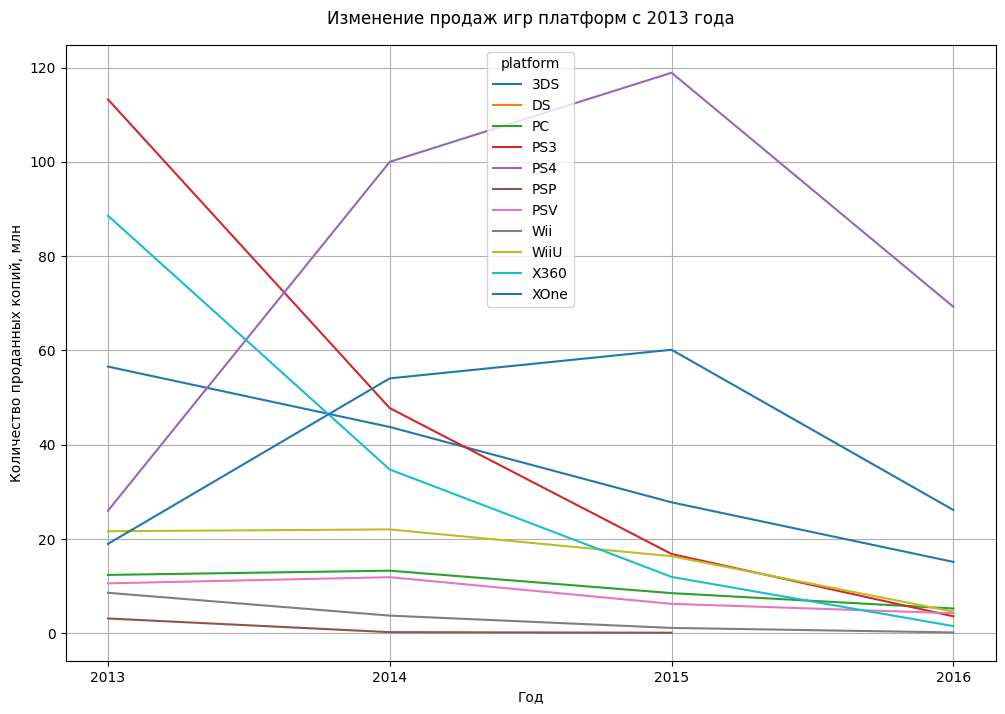

In [53]:
# График построим по новой сводной таблице, чтобы по оси x откладывались значения year_of_release, а не platform

(
    data_actual.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .plot(grid=True, figsize=(12, 8)))

plt.title('Изменение продаж игр платформ с 2013 года', pad=15)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий, млн')
plt.xticks([2013, 2014, 2015, 2016])
plt.show()

Следующие платформы имеют наибольшие продажи в 2015-2016 годах:
* PS4 - 118.9 млн в 2015, 
  * 70 млн - 2016
* XOne - 60.14 млн в 2015, 
  * 26 млн - 2016
  
Имеют очевидный и сильный спад в продажах по 2013-2015 годах:
* PS3 - продажи за 2 года упали более чем в 6 раз
* 3DS - продажи за 2 года упали в 2 раза
* X360 - продажи за 2 года упали более чем в 7 раз

Самые низкие продажи без значительного спада или роста - можем ожидать продажи на таком же уровне в 2017:
* WiiU - 16.3 млн за 2015
* PC - 8.52 млн за 2016

Отсутствуют продажи в 2016:
* PSP

**Вывод:**

Можем ожидать:
1. наиболее высоких продаж - у PS4 (до 100 млн).
2. высоких продаж - XOne (до 50 млн) и 3DS (до 20 млн)
3. низких продаж - WiiU и PC (до 10 млн)

### «Ящик с усами» по глобальным продажам игр в разбивке по платформам

Построим диаграмму размаха для платформ:

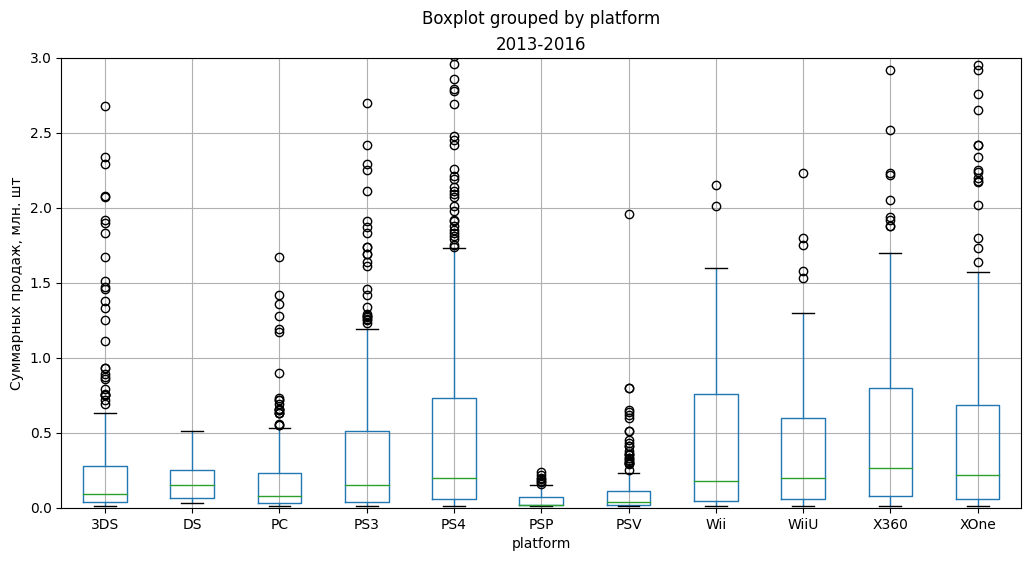

In [54]:
data_actual.boxplot(column='total_sales', by='platform', figsize=(12, 6))

plt.title('2013-2016')
plt.ylabel('Суммарных продаж, млн. шт')
plt.ylim(0,3)
plt.show()

* Высокие показатели медиан, межквартильного размаха и максимальных значений до выбросов для PS3, Wii и X360 могут быть обусловлены высокими продажами в 2013 (как мы определили ранее, за 2 года у них произошел сильный спад продаж)


Если исключить данные 2013 года:

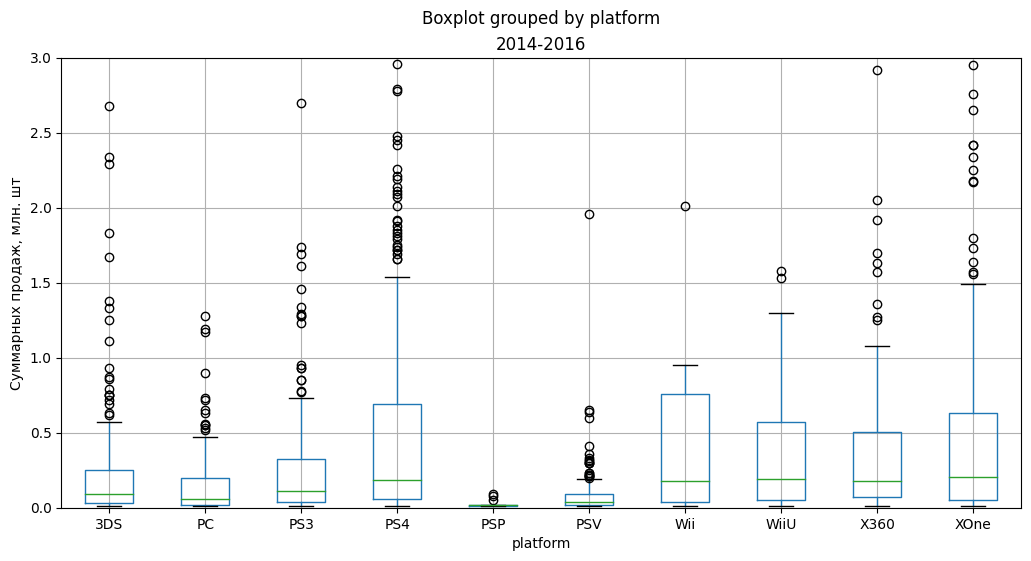

In [55]:
data.query('year_of_release > 2013').boxplot(column='total_sales', by='platform', figsize=(12, 6))

plt.title('2014-2016')
plt.ylabel('Суммарных продаж, млн. шт')
plt.ylim(0,3)
plt.show()

* для PS3, Wii и X360 с 2014 года медианы и межквартильный размах с максимальными значениями - не выбросами - значительно ниже в сравнении с 2013.   
Выделяются XOne и PS4.

Сравним медианы, межквартильные размахи и максимальные значения, не являющиеся выбросами, для платформ, от которых ожидаем наибольших продаж по итогам 3.4: PS4, XOne, 3DS:

In [56]:
print ('Медианы:')
print ('PS4 - ', data_actual.query('platform == "PS4"')['total_sales'].median())
print ('XOne - ', data_actual.query('platform == "XOne"')['total_sales'].median())
print ('3DS - ', data_actual.query('platform == "3DS"')['total_sales'].median())

print ('\nМежквартильный размах: ')
print ('PS4 - ', stats.iqr(data_actual.query('platform == "PS4"')['total_sales']).round(2))
print ('XOne - ', stats.iqr(data_actual.query('platform == "XOne"')['total_sales']).round(2))
print ('3DS - ', stats.iqr(data_actual.query('platform == "3DS"')['total_sales']).round(2))

print ('\nМаксимальное значение, не являющееся выбросом: ')

print ('PS4 - ', (data_actual.query('platform == "PS4"')['total_sales'].quantile(0.75) 
                  + stats.iqr(data_actual.query('platform == "PS4"')['total_sales']) * 1.5).round(2))

print ('XOne - ', (data_actual.query('platform == "XOne"')['total_sales'].quantile(0.75) 
                   + stats.iqr(data_actual.query('platform == "XOne"')['total_sales']) * 1.5).round(2))

print ('3DS - ', (data_actual.query('platform == "3DS"')['total_sales'].quantile(0.75) 
                  + stats.iqr(data_actual.query('platform == "3DS"')['total_sales']) * 1.5).round(2))

Медианы:
PS4 -  0.2
XOne -  0.22
3DS -  0.09

Межквартильный размах: 
PS4 -  0.67
XOne -  0.62
3DS -  0.24

Максимальное значение, не являющееся выбросом: 
PS4 -  1.74
XOne -  1.62
3DS -  0.64




Медиана:
* примерно равна у PS4 и XOne - около 0.2 млн.  
* для 3DS значительно ниже - 0.09

Межквартильный разброс
* Наибольший у PS4, XOne чуть ниже на 0.44 млн
* 3DS значительно ниже

Максимальное значение, не являющееся выбросом: 
* Наивысшее у PS4, XOne ниже на 0.11 млн
* 3DS значительно ниже

**Вывод:**

PS4 и XOne имеют лучшие показатели.  
* Продажи игр на PS4 по рассмотренным параметрам описательной статистики немного превосходят продажи XOne.


3DS значительно отстает: 
* Медианное значение продаж почти в 20 раз ниже, межквартильный размах - в 2 раза, макс значение до выбросов - в 2.5 раза.   
  **Далее эту платформу как одну из перспективных для продаж на 2017 год рассматривать не будем.**


#### Влияние на продажи отзывов

Посмотрим, как влияют на продажи отзывы пользователей и критиков.

Для наиболее перспективных PS4 и XOne, и всех остальных платформ.

##### PS4:

Посчитаем коэффициент корреляции между продажами и 
1. оценкой критиков
2. оценкой пользователей

In [57]:
print ('critic_score: ', data_actual.query('platform == "PS4"')['total_sales']
       .corr(data_actual.query('platform == "PS4"')['critic_score']).round(2))

print ('user_score: ', data_actual.query('platform == "PS4"')['total_sales']
       .corr(data_actual.query('platform == "PS4"')['user_score']).round(2))

critic_score:  0.4
user_score:  -0.03


Построим диаграммы рассеяния:

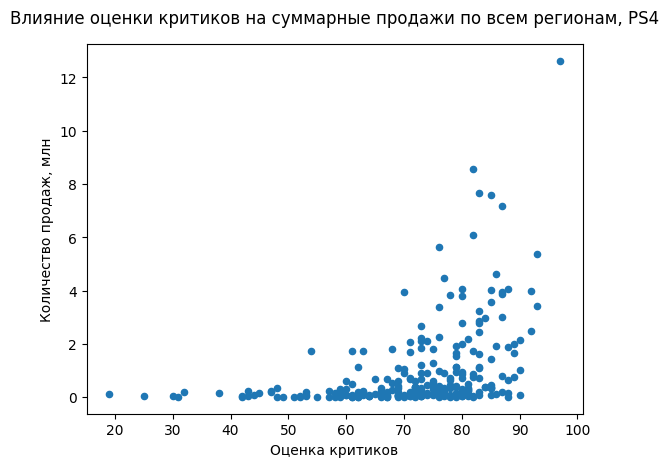

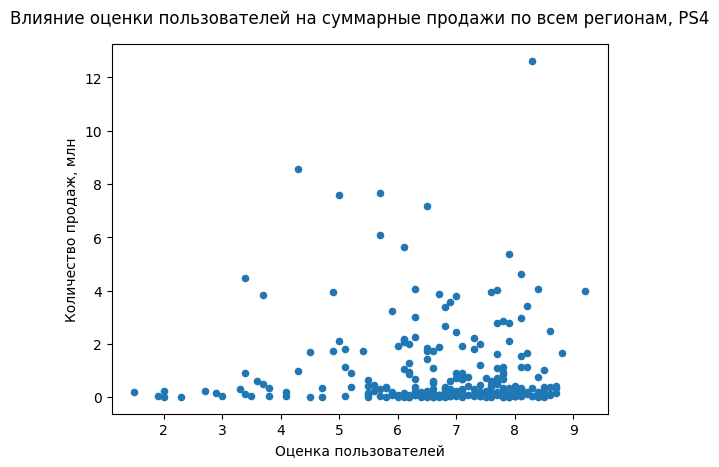

In [58]:
data_actual.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Влияние оценки критиков на суммарные продажи по всем регионам, PS4', pad=15)
plt.ylabel('Количество продаж, млн')
plt.xlabel('Оценка критиков')
plt.show()

data_actual.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Влияние оценки пользователей на суммарные продажи по всем регионам, PS4', pad=15)
plt.ylabel('Количество продаж, млн')
plt.xlabel('Оценка пользователей')
plt.show()

**Вывод для PS4:**

Оценка критиков оказывает среднее влияние на продажи:
* коэффициент Пирсона - 0.4

Оценка пользователей не влияет на продажи:
* коэффициент Пирсона - -0.03

##### XOne:

Посчитаем коэффициент корреляции между продажами и 
1. оценкой критиков
2. оценкой пользователей

In [59]:
print ('critic_score: ', data_actual.query('platform == "XOne"')['total_sales']
       .corr(data_actual.query('platform == "XOne"')['critic_score']).round(2))

print ('user_score: ', data_actual.query('platform == "XOne"')['total_sales']
       .corr(data_actual.query('platform == "XOne"')['user_score']).round(2))

critic_score:  0.41
user_score:  -0.06


Построим диаграммы рассеяния:

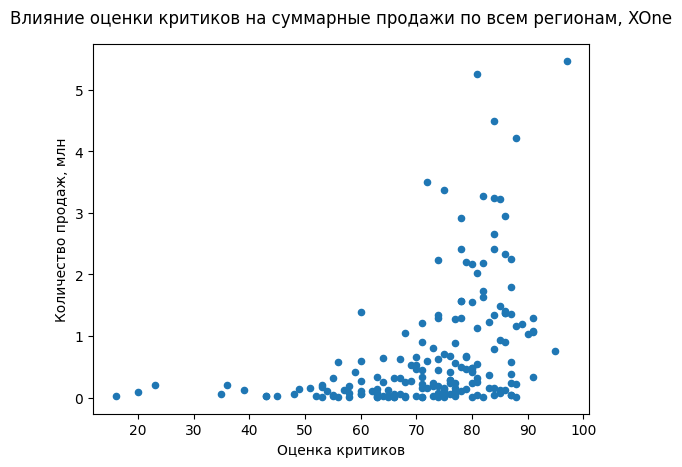

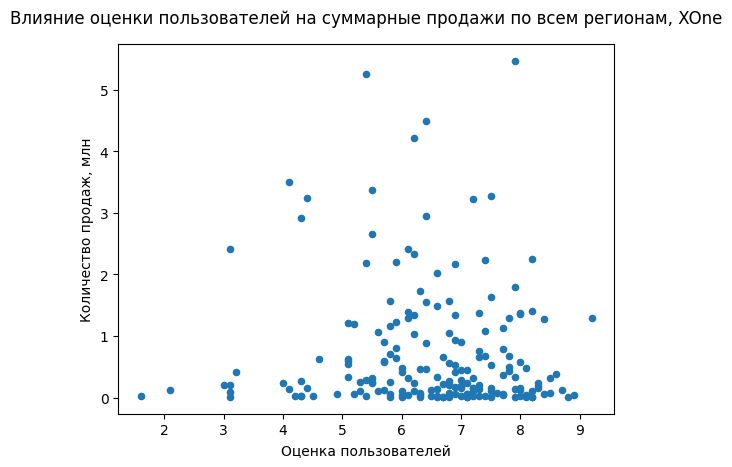

In [60]:
data_actual.query('platform == "XOne"').plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Влияние оценки критиков на суммарные продажи по всем регионам, XOne', pad=15)
plt.ylabel('Количество продаж, млн')
plt.xlabel('Оценка критиков')
plt.show()

data_actual.query('platform == "XOne"').plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Влияние оценки пользователей на суммарные продажи по всем регионам, XOne', pad=15)
plt.ylabel('Количество продаж, млн')
plt.xlabel('Оценка пользователей')
plt.show()

**Вывод для XOne:**

Так же, как и для PS4.

Оценка критиков оказывает среднее влияние на продажи:
* коэффициент Пирсона - 0.4

Оценка пользователей не влияет на продажи:
* коэффициент Пирсона - -0.06

##### Для всех остальных платформ:

Коэффициент корреляции между продажами и 
1. оценкой критиков
2. оценкой пользователей

In [61]:
print ('critic_score: ', data_actual.query('platform != "XOne" and platform != "PS4"')['total_sales']
       .corr(data_actual.query('platform != "XOne" and platform != "PS4"')['critic_score']).round(2))

print ('user_score: ', data_actual.query('platform != "XOne" and platform != "PS4"')['total_sales']
       .corr(data_actual.query('platform != "XOne" and platform != "PS4"')['user_score']).round(2))

critic_score:  0.16
user_score:  0.01


Диаграммы рассеяния:

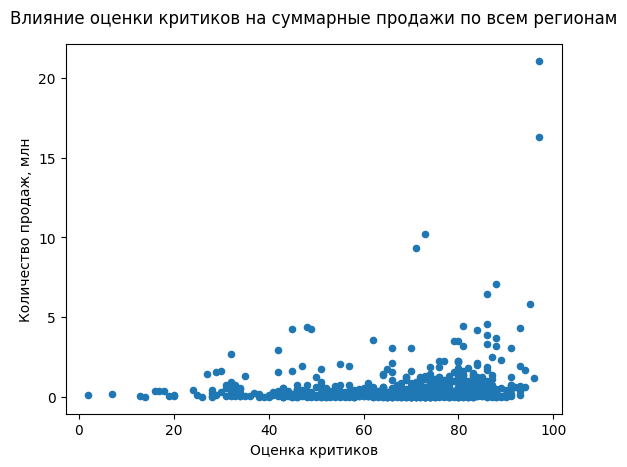

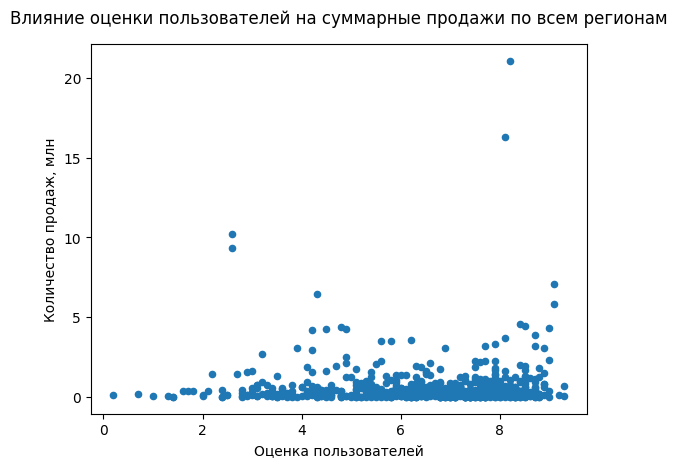

In [62]:
data_actual.query('platform != "XOne" and platform != "PS4"').plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Влияние оценки критиков на суммарные продажи по всем регионам', pad=15)
plt.ylabel('Количество продаж, млн')
plt.xlabel('Оценка критиков')
plt.show()

data_actual.query('platform != "XOne" and platform != "PS4"').plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Влияние оценки пользователей на суммарные продажи по всем регионам', pad=15)
plt.ylabel('Количество продаж, млн')
plt.xlabel('Оценка пользователей')
plt.show()

**Вывод для остальных платформ:**

Для остальных платформ влияение оценок критиков и пользователей еще слабее:


Оценка критиков оказывает слабое влияние на продажи:
* коэффициент Пирсона - 0.16

Оценка пользователей не влияет на продажи:
* коэффициент Пирсона - -0.01

##### Вывод

По имеющимся данным можно сделать вывод:

**PS4 и XOne:**

1. Оценка критиков оказывает среднее влияния (коэффициент 0.4) на продажи игр этих платформ.  
2. Оценка пользователей не оказывает влияния на продажи.

**Остальные платформы:**
1. Оценка критиков оказывает слабое влияние (коэффициент 0.16) на продажи игр этих платформ.  
2. Оценка пользователей не оказывает влияния на продажи.


Можно заключить, что пользователи чаще покупают игры на платформах PS4 и XOne с высокой оценкой критиков.  
На продажи игр других платформ этот фактор практически не оказывает влияния.

### Распределение игр по жанрам

Построим распределение игр по жанрам.   
Воспользуемся методом `plot.barh`, чтобы было удобнее читать названия жанров. 

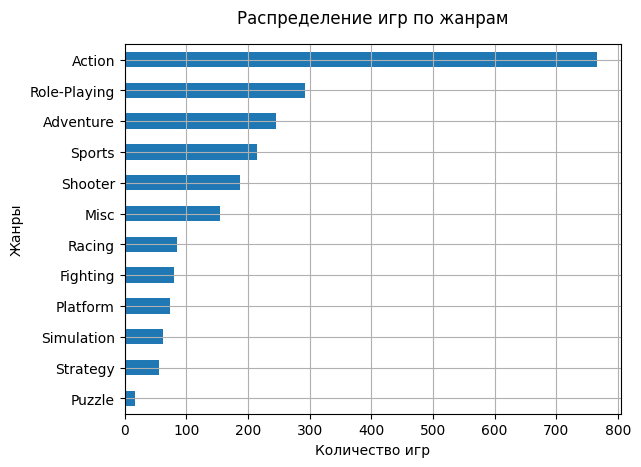

In [63]:
data_actual['genre'].value_counts(ascending=True).plot.barh(grid=True)

plt.title('Распределение игр по жанрам', pad=15)
plt.xlabel('Количество игр')
plt.ylabel('Жанры')
plt.show()

1. С большим отрывом чаще всего производят игры в жанре Action - около 760 шт.


2. Более 200 игр в жанре:
  * Role-Playing, Adventure, Sports


3. Более 100 игр в жанре:
  * Shooter, Misc
  
  
4. Реже всего производят игра в жанре:
  * Puzzle - менее 20 за рассматриваемый период (3 года)

Посмотрим на количество продаж игр в разных жанрах:

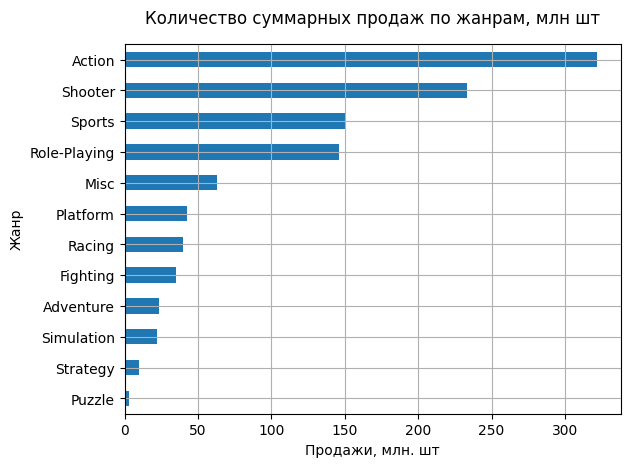

In [64]:
data_actual.groupby('genre')['total_sales'].sum().sort_values().plot.barh(grid=True)

plt.title('Количество суммарных продаж по жанрам, млн шт', pad=15)
plt.xlabel('Продажи, млн. шт')
plt.ylabel('Жанр')
plt.show()

Самые большие продажи: 
* Закономерно у игр жанра Action - около 350 млн шт.

На втором месте по продажам: 
* Жанр Shooter - около 230 млн.  
Что удивительно, поскольку по количеству произведенных игр он находится на 5 месте.

Более 100 млн:
* Role-Playing и Sports

Наименьшие продажи:
* Закономерно у жанра Puzzle

Дополнительно оценим среднее количество продаж одной игры для разных жанров:    
Построим сводную таблицу по количеству игр и суммарным продажам каждого жанра и посчитаем среднее количество продаж на одну игру.

In [65]:
genre_sales = data_actual.pivot_table(
    index='genre', values=['name', 'total_sales'], aggfunc = {'name': 'count', 'total_sales': sum})

genre_sales['sales_per_game'] = genre_sales['total_sales'] / genre_sales['name']
genre_sales.sort_values('sales_per_game', ascending=False)

,name,total_sales,sales_per_game
genre,,,
Shooter,187,232.98,1.245882
Sports,214,150.65,0.703972
Platform,74,42.63,0.576081
Role-Playing,292,145.89,0.499623
Racing,85,39.89,0.469294
Fighting,80,35.31,0.441375
Action,766,321.87,0.420196
Misc,155,62.82,0.405290
Simulation,62,21.76,0.350968


Визуализируем разницу:

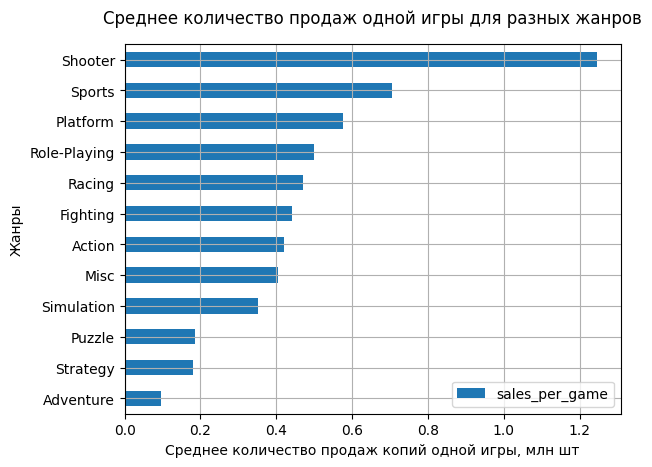

In [66]:
genre_sales.sort_values(by='sales_per_game').plot.barh(y='sales_per_game', grid=True)

plt.title('Среднее количество продаж одной игры для разных жанров', pad=15)
plt.xlabel('Среднее количество продаж копий одной игры, млн шт')
plt.ylabel('Жанры')
plt.show()

Наибольшие средние продажи для одной игры у жанра Shooter: 
* 1.25 млн шт для одной игры.

Жанр Action с самым большим количеством игр и самыми большими суммарными продажами:
* 0.42 млн шт для одной игры - в середине рейтинга

Наименьшие показатели у Puzzle, Strategy и Adventure, у которых также низкое количество игр и суммарных продаж:
* 0.19, 0.18 и 0.1 млн шт для одной игры соответственно

Построим диаграммы размаха продажи игр по жанрам:

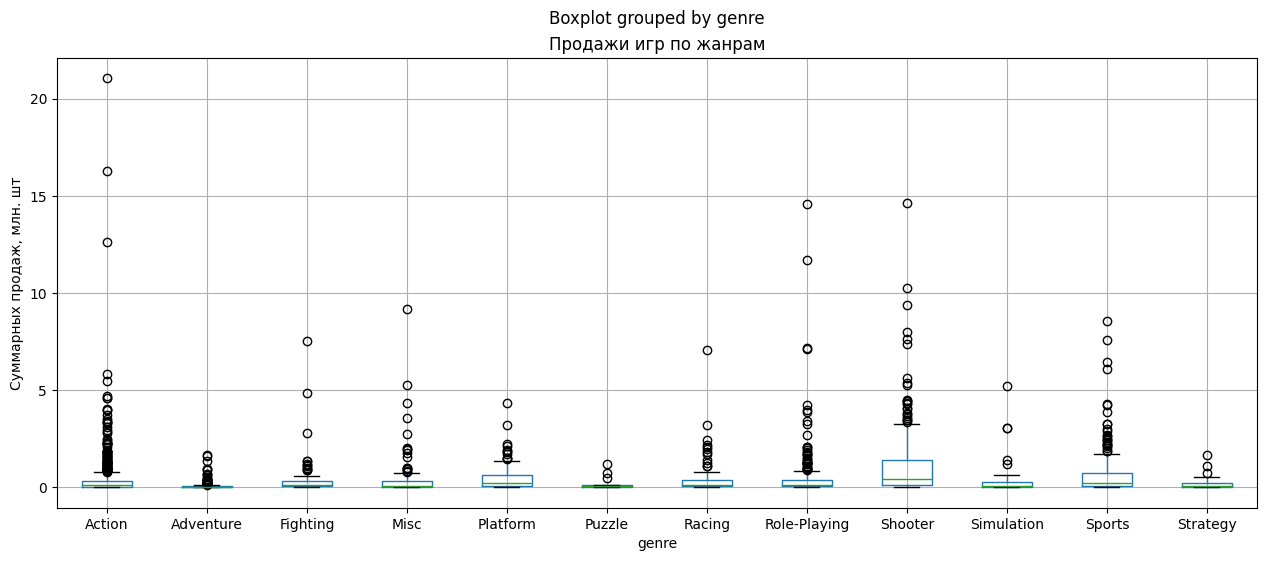

In [67]:
data_actual.boxplot(column='total_sales', by='genre', figsize=(15, 6))

plt.title('Продажи игр по жанрам')
plt.ylabel('Суммарных продаж, млн. шт')
plt.show()

* Самые большие выбросы у жанра Action - более 20 млн.  
Далее - Shooter и Role-Playing, под 14 млн.  


Рассмотрим более детально графики до 0.75 - квантиля:

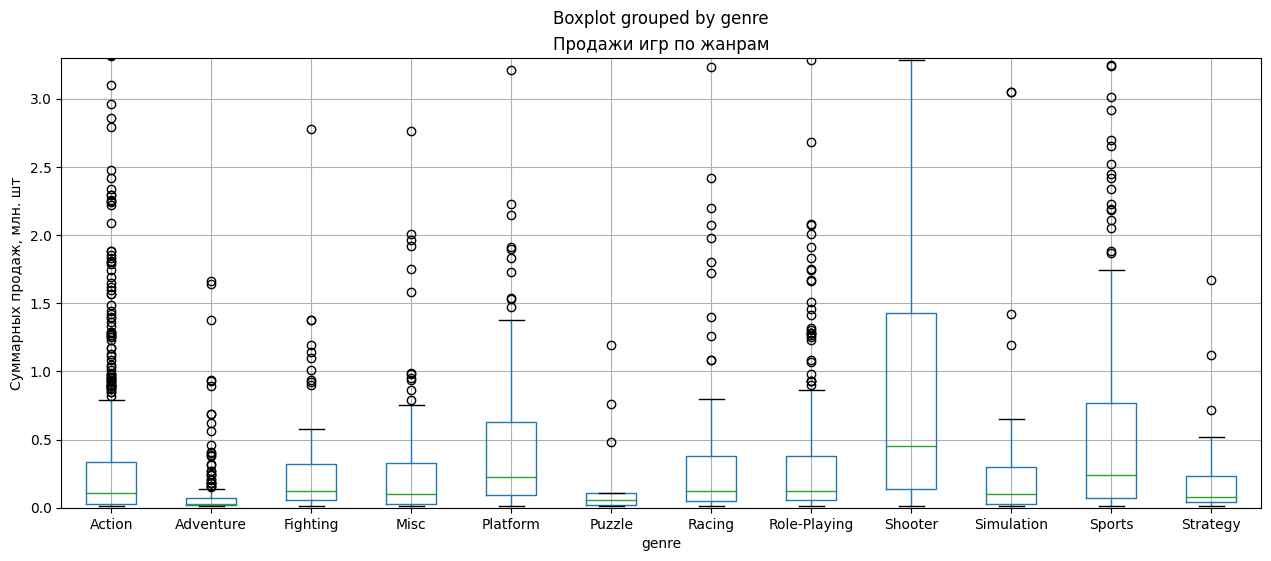

In [68]:
data_actual.boxplot(column='total_sales', by='genre', figsize=(15, 6))

plt.title('Продажи игр по жанрам')
plt.ylabel('Суммарных продаж, млн. шт')
plt.ylim(0, 3.3)
plt.show()

По графику можно сказать, что:
1. Наибольший ряд успешных игр у жанров Shooter, Sports, Platform.   
 Самые большие медианы, широкий межквартильный размах и большой показатель 0.75-квантиля - наибольшее число продаж, которые не будут считаться выбросами.
 
2. Самый продаваемый жанр Action по этим показателям отстает и имеет примерно схожие показатели с жанрами Misc, Racing.
 
 

**Вывод:**

Количество игр в жанрах:  
1. Наибольшее - Action. 760 шт
2. Более 200 шт - Role-Playing, Adventure, Sports
3. Более 100 шт - Shooter, Misc
4. Самый редкий - Puzzle. Менее 20 шт


Суммарные продажи:
1. Наибольшее - Action. 350 млн
2. Второе место - Shooter. 230 млн
3. Более 100 млн - Role-Playing, Sports
4. Наименьшие - Puzzle. 

Продажи за одну игру в среднем:
1. Наибольшее - Shooter. 1.25 млн
2. Второй и третий - Sports. 0.7 млн, Platform. 0.56
3. Наименьшее - Puzzle (0.19), Strategy (0.18), Adventure (0.1)
4. Остальные - более 0.35 млн.

Выделяются по диаграмме размаха:  
1. Наибольший ряд успешных игр у жанров Shooter, Sports, Platform.
2. Самый продаваемый жанр Action по этим показателям отстает и имеет примерно схожие показатели с жанрами Misc, Racing.

______

### **Вывод по 3 разделу** 

**1.** Принято решение производить анализ данных по периоду с 2013 года включительно.

Причины:
* Производство игр после пика 2006-2011 годов значительно сократилось с 2012 года и с тех пор имеет примерно одинаковый уровень в 500-650 шт в год (определили в 3.1)
* Появление новой платформы PS4 и её выход на пик продаж началось с 2013 года (определили в 3.2)

**2.** Потенциально прибыльные платформы:
1. PS4:
 * Проходят пик продаж с 2013 года, продажи на 2016 год - 70 млн.
   * 2015 - 118.9 млн
 * Медиана продаж для игры - 0.2 млн
 * Max значение, не являющееся выбросом - 1.73 млн 
2. XOne:
 * Продажи на 2016 год - около 30 млн.
   * 2015 - 60.14 млн
 * Медиана продаж для игры - 0.22 млн
 * Max значение, не являющееся выбросом - 1.6 млн


**3.** Влияние отзывов на продажи:
1. Отзывы критиков:
 * Средняя корреляция (0.4) для PS4 и XOne
 * Слабая корреляция (0.16) для остальных платформ
2. Отзывы пользователей
 * Практически нулевая корреляция для всех платформ, включая PS4 и XOne
 
**4.** Распределение игр по жанрам:
1. Количество игр в жанрах:  
  * Наибольшее - Action. 760 шт
  * Много - Role-Playing, Adventure, Sports. Более 200 шт
  * Самый редкий - Puzzle. Менее 20 шт


2. Суммарные продажи:
  * Наибольшие - Action (350 млн), Shooter (230 млн)
  * Наименьшие - Puzzle. 
  

3. Продажи за одну игру в среднем:
  * Наибольшее - Shooter. 1.25 млн
  * Много - Sports. 0.7 млн, Platform. 0.56
  * Наименьшее - Puzzle (0.19), Strategy (0.18), Adventure (0.1)
  
Наибольший ряд успешных игр у жанров Shooter, Sports, Platform.
_________

## **Шаг 4.** Портрет пользователя каждого региона

Для дальнейшего понимания уточним, что означают рейтинги ESRB:
1. E («Everyone») 
  * «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.


2. E10+ («Everyone 10 and older») 
  * «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.


3. T («Teen») 
  * «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.


4. M («Mature»):
  * «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.

#### Регион NA - Северная Америка

##### Топ-5 популярных платформ

Для каждой платформы посчитаем сумму продаж по Северной Америке `na_sales`:

In [69]:
na_sales = data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
na_sales

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20
5,WiiU,29.21
6,PC,11.11
7,Wii,6.56
8,PSV,5.04
9,DS,0.57


* Видим лидерство PS4 и XOne.  
На третьем месте видим X360, который ранее в работе показал сильное падение продаж после 2013 года.

Поскольку ранее отметили сильный спад продаж после 2013 года для PS3 и X360, будет корректно далее для популярных платформ проводить исследования начиная с 2014 года:

In [70]:
na_sales = (data_actual.query('year_of_release > 2013')
            .groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index())
na_sales

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,WiiU,19.36
6,PC,7.23
7,PSV,2.52
8,Wii,2.08
9,PSP,0.00


* Топ-5: 1 - PS4, 2 - XOne, 3 - X360, 4 - 3DS, 5 - PS3

Добавим столбец с долей продаж и выведем на экран для топ-5 платформ:

In [71]:
na_sales['percent'] = (na_sales['na_sales'] / na_sales['na_sales'].sum())

print ('Общая доля продаж в регионе NA для топ-5 платформ: ', na_sales[0:5]['percent'].sum().round(2))
na_sales[0:5]

Общая доля продаж в регионе NA для топ-5 платформ:  0.89


,platform,na_sales,percent
0,PS4,98.61,0.347145
1,XOne,81.27,0.286102
2,X360,28.30,0.099627
3,3DS,22.64,0.079701
4,PS3,22.05,0.077624


**Вывод:**

Топ-5 самых популярных платформ вместе имеют долю в 89% суммарных продаж по региону NA среди всех платформ.

Почти половину из всех продаж по NA имеют платформы PS4 и XOne:
* PS4 - 34,7%, 
* XOne - 28,6%

В топ-5:
* X360 - 10%
* 3DS - 8%
* PS3 - 7.8%

##### Топ-5 жанров

Для каждого жанра посчитаем сумму продаж по Северной Америке `na_sales`:

In [72]:
na_genres = data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
na_genres

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49
5,Platform,18.14
6,Fighting,15.55
7,Racing,12.96
8,Adventure,7.14
9,Simulation,4.86


Топ-5 жанров:
* Action, Shooter, Sports, Role-Playing, Misc

Добавим столбец с долей продаж и выведем на экран для топ-5 жанров:

In [73]:
na_genres['percent'] = na_genres['na_sales'] / na_genres['na_sales'].sum()

print ('Общая доля продаж в регионе NA для топ-5 жанров: ', na_genres[0:5]['percent'].sum().round(2))
na_genres[0:5]

Общая доля продаж в регионе NA для топ-5 жанров:  0.86


,genre,na_sales,percent
0,Action,126.05,0.287976
1,Shooter,109.74,0.250714
2,Sports,65.27,0.149117
3,Role-Playing,46.40,0.106006
4,Misc,27.49,0.062804


**Вывод:**

Общая доля продаж в регионе NA топ-5 жанров - 86%

Более половины всех продаж имеют жанры Action и Shooter:
* Action - 28.8%
* Shooter - 25.1%

Более 10%:
* Sports - 14.9%
* Role-Playing - 10.6%

##### Влияние рейтинга ESRB на продажи

Для каждого рейтинга ESRB посчитаем сумму и долю продаж в регионе NA:

In [74]:
na_rating = data_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
na_rating['percent_of_sales_na'] = na_rating['na_sales'] / na_rating['na_sales'].sum()
na_rating

,rating,na_sales,percent_of_sales_na
0,M,165.21,0.377442
1,undefined,89.42,0.204291
2,E,79.05,0.180599
3,E10+,54.24,0.123918
4,T,49.79,0.113751


Почти в половина всех продаж (47%): игры с рейтингом ESRB - M  
Далее 22% - рейтинг E  
По 15% - E10+ и T

Для объективной оценки необходимо взглянуть на количество произведенных игр по каждому рейтингe и процент от общего числа:

In [75]:
rating_games = data['rating'].value_counts().reset_index()
rating_games['percent_of_games'] = rating_games['rating'] / rating_games['rating'].sum()
rating_games.columns = ['rating', 'amount_of_games', 'percent_of_games']
rating_games

,rating,amount_of_games,percent_of_games
0,undefined,6764,0.404739
1,E,3992,0.238870
2,T,2961,0.177178
3,M,1563,0.093526
4,E10+,1420,0.084969
5,EC,8,0.000479
6,RP,3,0.000180
7,AO,1,0.000060


Объединим две таблицы, чтобы сравнить и построить график:

In [76]:
rating_games = rating_games.merge(na_rating, on='rating', how='outer')
rating_games

,rating,amount_of_games,percent_of_games,na_sales,percent_of_sales_na
0,undefined,6764,0.404739,89.42,0.204291
1,E,3992,0.238870,79.05,0.180599
2,T,2961,0.177178,49.79,0.113751
3,M,1563,0.093526,165.21,0.377442
4,E10+,1420,0.084969,54.24,0.123918
5,EC,8,0.000479,NaN,NaN
6,RP,3,0.000180,NaN,NaN
7,AO,1,0.000060,NaN,NaN


Строим график для сравнения долей производства игр разного рейтинга и долей их продаж в NA:

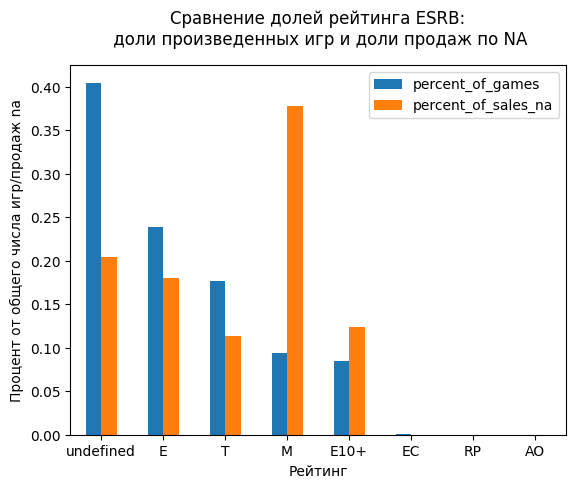

In [77]:
rating_games.plot(x='rating', y=['percent_of_games', 'percent_of_sales_na'], kind='bar')

plt.title('Сравнение долей рейтинга ESRB:\n доли произведенных игр и доли продаж по NA', pad=15)
plt.xlabel('Рейтинг')
plt.ylabel('Процент от общего числа игр/продаж na')
plt.xticks(rotation=0)
plt.show()

**Вывод:**

По графику видно, что при том, что в наибольшем количестве производятся игры рейтинга E и T, игры с рейтингом M имеют наибольшую долю продаж в регионе NA.

Можно заключить, что наибольшей популярностью в этом регионе обладают игры рейтинга M.

Второе место занимают игры с неопределенным рейтингом, 20%.


##### Вывод по NA

**1. Платформы**  

Топ-5 популярных:  
*  PS4, XOne, X360, 3DS, PS3  

Топ-5 платформ имеют долю в 89% суммарных продаж по региону NA среди всех платформ.

Более половины из всех продаж по NA имеют платформы PS4 и XOne:
* PS4 - 34,7%, 
* XOne - 28,6%

В топ-5:
* X360 - 10%
* 3DS - 8%
* PS3 - 7.8%

**2. Жанры**  

Топ-5 жанров:
* Action, Shooter, Sports, Role-Playing, Misc

Общая доля продаж в регионе NA топ-5 жанров - 86%

Более половины всех продаж имеют жанры Action и Shooter:
* Action - 28.8%
* Shooter - 25.1%

**3. Влияние рейтинга ESRB на продажи**

Наибольшей популярностью в этом регионе обладают игры рейтинга M:
* 38% от всех продаж по NA при том, что игры этого рейтинга составляют всего 9% от общего числа произведенных игр


#### Регион EU

##### Топ-5 популярных платформ

Посчитаем продажи для каждой платформы в регионе:

In [78]:
eu_sales = data_actual.query('year_of_release > 2013').groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
eu_sales

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,X360,15.49
6,WiiU,13.15
7,PSV,3.53
8,Wii,2.59
9,PSP,0.00


Топ-5 популярных платформ:
* PS4, XOne, PS3, PC, 3DS

Определим долю продаж по региону для топ-5 популярных платформ:

In [79]:
eu_sales['percent'] = eu_sales['eu_sales'] / eu_sales['eu_sales'].sum()

print ('Общая доля продаж в регионе EU для топ-5 платформ: ', eu_sales[0:5]['percent'].sum().round(2))
eu_sales[0:5]

Общая доля продаж в регионе EU для топ-5 платформ:  0.87


,platform,eu_sales,percent
0,PS4,130.04,0.480420
1,XOne,46.25,0.170866
2,PS3,25.54,0.094355
3,PC,17.97,0.066388
4,3DS,16.12,0.059554


**Вывод:**

Почти половина всех продаж в EU:
* PS4 - 48%

В топ-5:
* XOne - 17%
* PS3 - 9%
* PC - 6.6%
* 3DS - 6%

##### Топ-5 жанров

Посчитаем продажи для каждого жанра в регионе:

In [80]:
eu_genres = data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()
eu_genres

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19
5,Misc,20.04
6,Platform,15.58
7,Simulation,10.92
8,Fighting,8.55
9,Adventure,8.25


Топ-5 жанров:
* Action, Shooter, Sports, Role-Playing, Racing

Посчитаем долю от всех продаж для топ-5 жанров:

In [81]:
eu_genres['percent'] = eu_genres['eu_sales'] / eu_genres['eu_sales'].sum()

print ('Общая доля продаж в регионе EU для топ-5 жанров: ', eu_genres[0:5]['percent'].sum().round(2))
eu_genres[0:5]

Общая доля продаж в регионе EU для топ-5 жанров:  0.83


,genre,eu_sales,percent
0,Action,118.13,0.301175
1,Shooter,87.86,0.224001
2,Sports,60.52,0.154297
3,Role-Playing,36.97,0.094256
4,Racing,20.19,0.051475


**Вывод:**

Почти треть всех продаж:
* Action - 30%

Более 15%:
* Shooter - 22%
* Sports - 15%

##### Влияние рейтинга ESRB на продажи

Для каждого рейтинга посчитаем количество продаж и процент от всех продаж в регионе:

In [82]:
eu_rating = data_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
eu_rating['percent_of_sales_eu'] = eu_rating['eu_sales'] / eu_rating['eu_sales'].sum()
eu_rating

,rating,eu_sales,percent_of_sales_eu
0,M,145.32,0.370497
1,E,83.36,0.212528
2,undefined,78.91,0.201183
3,E10+,42.69,0.108839
4,T,41.95,0.106953


Добавим значения в созданный в 4.1.3 `rating_games`, чтобы сравнить доли продаж в EU и доли производства игр этого рейтинга:

In [83]:
rating_games = rating_games.merge(eu_rating, on='rating', how='outer')
rating_games

,rating,amount_of_games,percent_of_games,na_sales,percent_of_sales_na,eu_sales,percent_of_sales_eu
0,undefined,6764,0.404739,89.42,0.204291,78.91,0.201183
1,E,3992,0.238870,79.05,0.180599,83.36,0.212528
2,T,2961,0.177178,49.79,0.113751,41.95,0.106953
3,M,1563,0.093526,165.21,0.377442,145.32,0.370497
4,E10+,1420,0.084969,54.24,0.123918,42.69,0.108839
5,EC,8,0.000479,NaN,NaN,NaN,NaN
6,RP,3,0.000180,NaN,NaN,NaN,NaN
7,AO,1,0.000060,NaN,NaN,NaN,NaN


Строим график:

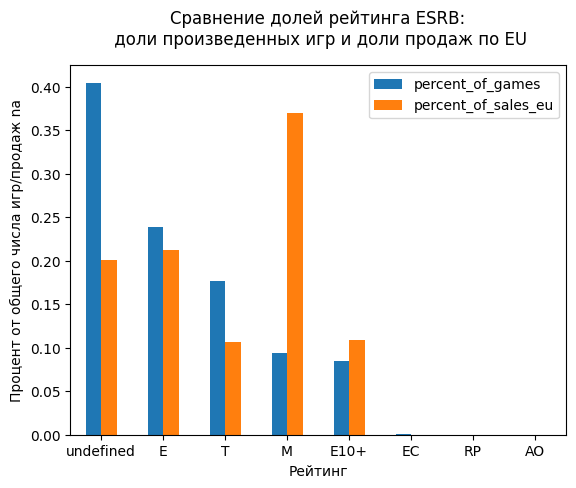

In [84]:
rating_games.plot(x='rating', y=['percent_of_games', 'percent_of_sales_eu'], kind='bar')

plt.title('Сравнение долей рейтинга ESRB:\n доли произведенных игр и доли продаж по EU', pad=15)
plt.xlabel('Рейтинг')
plt.ylabel('Процент от общего числа игр/продаж na')
plt.xticks(rotation=0)
plt.show()

**Вывод:**

Как и для NA, видим, что доля продаж по региону наиболее популярного в EU рейтинг M значительно превосходит долю игр этого рейтинга от общего числа произведенных игр.

3 и 2 места занимают игры неопределенного рейтинга и рейтинга E.

Можно заключить, что наибольшей популярностью в этом регионе обладают игры рейтинга M.

##### Вывод по EU

**1. Платформы**  

Топ-5 популярных:  
* PS4, XOne, PS3, PC, 3DS

Топ-5 платформ имеют долю в 87% суммарных продаж по региону EU среди всех платформ.

Почти половина всех продаж в EU:
* PS4 - 48%

2 место:
* XOne - 17%

В топ-5:
* PS3 - 9%
* PC - 6.6%
* 3DS - 6%

**2. Жанры**  

Топ-5 жанров:
* Action, Shooter, Sports, Role-Playing, Racing

Общая доля продаж в регионе NA топ-5 жанров - 83%

Почти треть всех продаж:
* Action - 30%

Более 15%:
* Shooter - 22%
* Sports - 15%

**3. Влияние рейтинга ESRB на продажи**

Наибольшей популярностью в этом регионе обладают игры рейтинга M:
* 37% от всех продаж по EU при том, что игры этого рейтинга имеют всего 16% от общего числа произведенных игр

#### Регион JP

##### Топ-5 популярных платформ

Посчитаем количество продаж в регионе для каждой платформы:

In [85]:
jp_sales = (data_actual.query('year_of_release > 2013')
            .groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index())

jp_sales.head()

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


Топ-5 популярных платформ:
* 3DS, PS4, PSV, PS3, WiiU

Посчитаем процент от общего количества продаж в регионе для топ-5 платформ:

In [86]:
jp_sales['percent'] = jp_sales['jp_sales'] / jp_sales['jp_sales'].sum()

print ('Общая доля продаж в регионе JP для топ-5 платформ: ', jp_sales[0:5]['percent'].sum().round(2))
jp_sales[0:5]

Общая доля продаж в регионе JP для топ-5 платформ:  0.99


,platform,jp_sales,percent
0,3DS,44.24,0.475239
1,PS4,15.02,0.161349
2,PSV,14.54,0.156193
3,PS3,11.22,0.120529
4,WiiU,7.31,0.078526


**Вывод:**

Топ-5 самых популярных платформ вместе имеют долю в 99% от всех продаж по региону JP среди всех платформ.

Почти половина продаж:
* 3DS - 47.5%

10-20%:
* PS4 - 16.6%
* PSV - 13.2%
* PS3 - 11.3%


*Регион JP заметно отличается от NA и EU по предпочтению среди платформ.  
Платформа 3DS здесь занимает лидирующую позицию, в то время как более распространенный в других регионах PS4 находится на 2 месте и имеет лишь 16.6% от общего числа продаж*

*Также отметим наличие WiiU в рейтинге*

##### Топ-5 жанров

Посчитаем количество продаж в регионе для каждого жанра

In [87]:
jp_genres = data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()
jp_genres.head()

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


Топ-5:
* Role-Playing, Action, Misc, Fighting, Shooter

Наиболее выделяется топ-2:
* Role-Playing и Action

Посчитаем долю от общего числа продаж:

In [88]:
jp_genres['percent'] = jp_genres['jp_sales'] / jp_genres['jp_sales'].sum()

print ('Общая доля продаж в регионе JP для топ-5 жанров: ', jp_genres[0:5]['percent'].sum().round(2))
jp_genres[0:5]

Общая доля продаж в регионе JP для топ-5 жанров:  0.82


,genre,jp_sales,percent
0,Role-Playing,51.04,0.362551
1,Action,40.49,0.287612
2,Misc,9.20,0.065350
3,Fighting,7.65,0.054340
4,Shooter,6.61,0.046953


**Вывод:**

Более половины от всех продаж:
* Role-Playing - 36%
* Action - 29%

Остальные жанры имеют примерно одинаковый процент продаж.

##### Влияние рейтинга ESRB на продажи

Для каждого рейтинга посчитаем количество продаж и процент от всех продаж в регионе:

In [89]:
jp_rating = data_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()
jp_rating['percent_of_sales_jp'] = jp_rating['jp_sales'] / jp_rating['jp_sales'].sum()
jp_rating

,rating,jp_sales,percent_of_sales_jp
0,undefined,85.05,0.604134
1,T,20.59,0.146257
2,E,15.14,0.107544
3,M,14.11,0.100227
4,E10+,5.89,0.041838


* Наибольшая доля продаж у рейтинга T - 37%

Добавим значения в созданный в 4.1.3 `rating_games`, чтобы сравнить доли продаж в JP и доли производства игр этого рейтинга:

In [90]:
rating_games = rating_games.merge(jp_rating, on='rating', how='outer')
rating_games

,rating,amount_of_games,percent_of_games,na_sales,percent_of_sales_na,eu_sales,percent_of_sales_eu,jp_sales,percent_of_sales_jp
0,undefined,6764,0.404739,89.42,0.204291,78.91,0.201183,85.05,0.604134
1,E,3992,0.238870,79.05,0.180599,83.36,0.212528,15.14,0.107544
2,T,2961,0.177178,49.79,0.113751,41.95,0.106953,20.59,0.146257
3,M,1563,0.093526,165.21,0.377442,145.32,0.370497,14.11,0.100227
4,E10+,1420,0.084969,54.24,0.123918,42.69,0.108839,5.89,0.041838
5,EC,8,0.000479,NaN,NaN,NaN,NaN,NaN,NaN
6,RP,3,0.000180,NaN,NaN,NaN,NaN,NaN,NaN
7,AO,1,0.000060,NaN,NaN,NaN,NaN,NaN,NaN


Строим график для сравнения долей производства игр разного рейтинга и долей их продаж в JP:

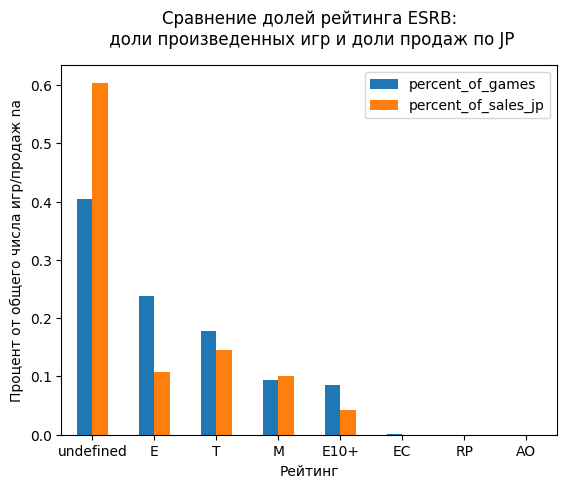

In [91]:
rating_games.plot(x='rating', y=['percent_of_games', 'percent_of_sales_jp'], kind='bar')

plt.title('Сравнение долей рейтинга ESRB:\n доли произведенных игр и доли продаж по JP', pad=15)
plt.xlabel('Рейтинг')
plt.ylabel('Процент от общего числа игр/продаж na')
plt.xticks(rotation=0)
plt.show()

**Вывод:**

Более половины (60%) всех продаж - игры с неопределенным рейтингом

Популярный в NA и EU рейтинг M находится всего на 4 месте в списке топ-продаж, 10%.

##### Вывод по JP

Регион JP (Япония) отличается от регионов EU и NA по предпочтениям в платформах, жанров и влиянию рейтинга ESRB на продажи.

**1. Платформы**  

Топ-5 популярных:  
* 3DS, PS4, PSV, PS3, WiiU

Топ-5 платформ имеют долю в 99% суммарных продаж по региону EU среди всех платформ.

Почти половина продаж:
* 3DS - 47.5%
10-20%:
* PS4 - 16.6%
* PSV - 13.2%
* PS3 - 11.3%

Регион JP заметно отличается от NA и EU по предпочтению среди платформ.
Платформа 3DS здесь занимает лидирующую позицию, в то время как более распространенный в других регионах PS4 находится на 2 месте и имеет лишь 16.6% от общего числа продаж

Также отметим наличие WiiU в рейтинге


**2. Жанры**  

Топ-5:
* Role-Playing, Action, Misc, Fighting, Shooter

Наиболее выделяется топ-2:
* Role-Playing и Action

Общая доля продаж в регионе топ-5 жанров - 82%

Более половины от всех продаж:
* Role-Playing - 36%
* Action - 29%

Остальные жанры имеют примерно одинаковый процент продаж.

**3. Влияние рейтинга ESRB на продажи**

Более половины всех продаж - игры с неопределенным рейтингом `undefined`:
* 60%

Популярный в NA и EU рейтинг M находится всего на 4 месте в списке топ-продаж: 
* 10%.

Также популярны игры рейтинга T и E (14% и 10% соответственно)

### **Вывод по 4 разделу**

Построим диаграммы портретов пользователей.

Подготавливаем таблицы для построения диаграмм:

In [92]:
# Создадим новые датафреймы по продажам
na_platform_pie = na_sales.copy()
eu_platform_pie = eu_sales.copy()
jp_platform_pie = jp_sales.copy()

# Создадим новые датафреймы по жанрам
na_genres_pie = na_genres.copy()
eu_genres_pie = eu_genres.copy()
jp_genres_pie = jp_genres.copy()

# Создадим новые датафреймы по рейтингам
na_rate = na_rating.copy().groupby('rating')['na_sales'].sum()
eu_rate = eu_rating.copy().groupby('rating')['eu_sales'].sum()
jp_rate = jp_rating.copy().groupby('rating')['jp_sales'].sum()

# Функция, которая группирует датафрейм по категориям, объединяет в 'others' все категории, кроме топ-5, и считает продажи
def series_for_pie(df, column, region_column):
    param = df[column].where(df[column].isin(df.loc[0:4][column]), 'Others')
    result = df.groupby(param)[region_column].sum().sort_values()
    return result

   # Применяем функцию к датафреймам с платформами и жанрами для создания категории 'others'
# Платформы
na_platform_pie = series_for_pie(na_platform_pie, 'platform', 'na_sales')
eu_platform_pie = series_for_pie(eu_platform_pie, 'platform', 'eu_sales')
jp_platform_pie = series_for_pie(jp_platform_pie, 'platform', 'jp_sales')
# Жанры
na_genres_pie = series_for_pie(na_genres_pie, 'genre', 'na_sales')
eu_genres_pie = series_for_pie(eu_genres_pie, 'genre', 'eu_sales')
jp_genres_pie = series_for_pie(jp_genres_pie, 'genre', 'jp_sales')

Строим диаграммы:

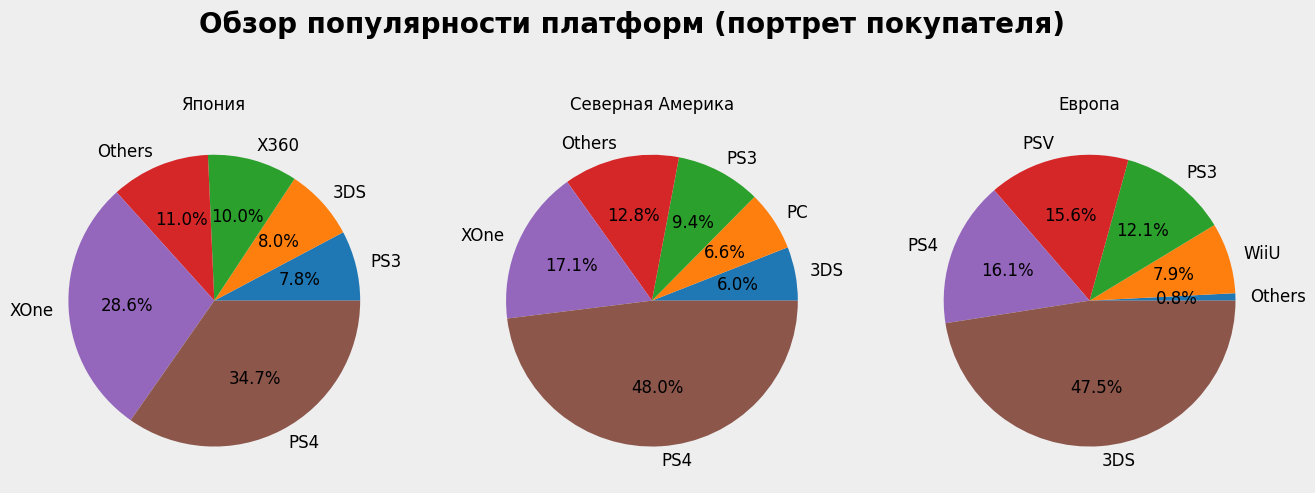

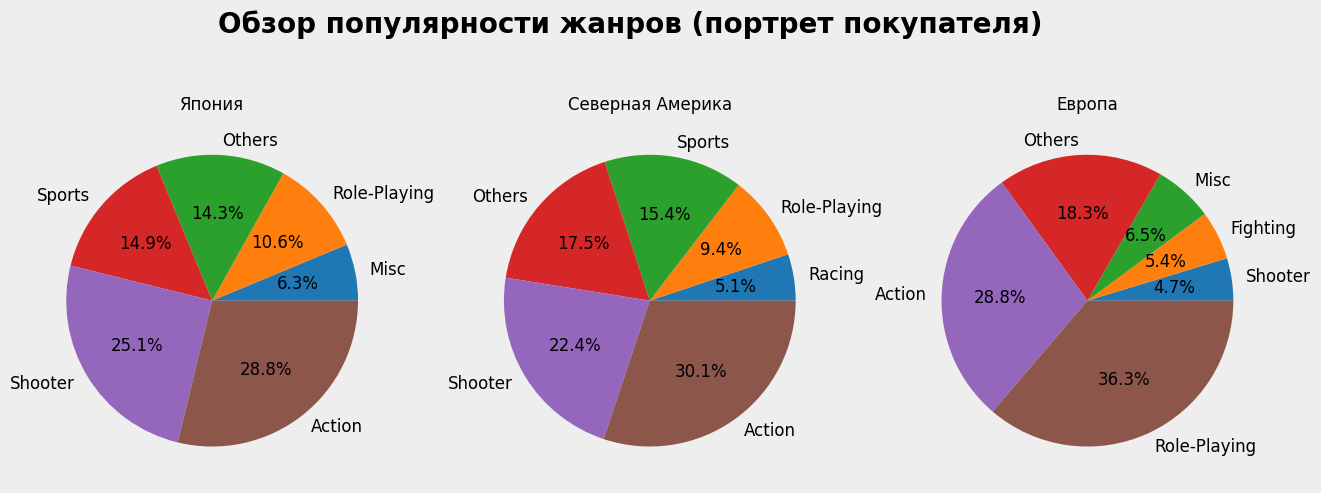

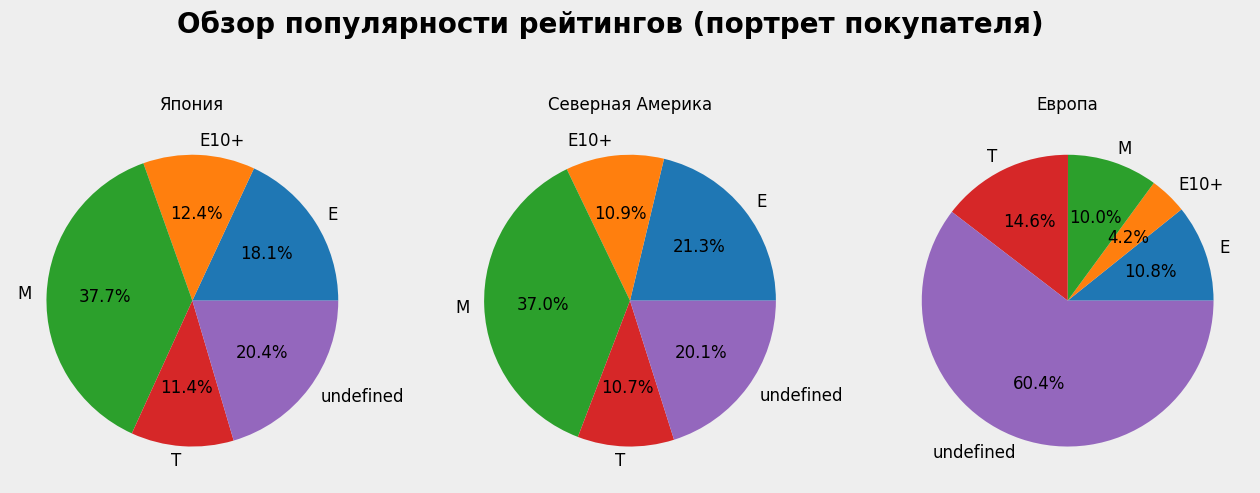

In [93]:
titles = ['Северная Америка', 'Европа', 'Япония']

# Функция построения диаграмм через subplots:
def diagramma(df1, df2, df3, text):
    
    f, ax = plt.subplots(1, 3)
    f.set_size_inches(16, 6)  
    f.set_facecolor('#eee')
    
    i = 0 
    
    # для трех датафреймов строим диаграммы, название каждой диаграммы берем из titles
    for df in [df1, df2, df3]:
        ax[i].pie(df, autopct='%1.1f%%', labels = df.index, textprops={'fontsize': 12})
        ax[i].set_title(titles[i-1])
        i += 1
    plt.suptitle(text, fontsize=20, fontweight = 'bold')
    plt.show()
    
    
diagramma(na_platform_pie, eu_platform_pie, jp_platform_pie, 'Обзор популярности платформ (портрет покупателя)')
diagramma(na_genres_pie, eu_genres_pie, jp_genres_pie, 'Обзор популярности жанров (портрет покупателя)')
diagramma(na_rate, eu_rate, jp_rate, 'Обзор популярности рейтингов (портрет покупателя)')

Предпочтения в платформах и жанрах в регионах EU и NA схожи, в то время как JP сильно отличается от них по этим показателям.

**EU & NA:**  
* PS4 является наиболее популярной платформой с процентом продаж по регионам 48% и 34% соответственно.  
* После него идет XOne (17% - 28.6%) 

Также популярны: PS3, X360, 3DS, PC(в EU)

К наиболее популярным жанрам можем отнести: Action, Shooter и Sports.  
Action и Shooter имеют более 50% от всей совокупности продаж в регионе.

Наибольшей популярностью в этом регионе обладают игры рейтинга M (37% - 38%).


**JP:**  
Здесь наиболее популярна платформа 3DS - 47.5%.  
Также к популярным можем отнести PS3, PSV, PS4.
Входит в топ-5 также, в сравнении с NA и EU, WiiU.

Наиболее популярным жанром можно назвать Role-Playing и Action - имеют более 50% от совокупности всех продаж в регионе.

Заметно большей популярностью пользуются игры с неопределенным рейтингом (60%). 

Популярный в NA и EU рейтинг M находится всего на 4 месте в списке топ-продаж: 10%.

## **Шаг 5.** Проверка гипотез

### Гипотеза 1:  
**Средние пользовательские рейтинги платформ Xbox One и PC одинаковы**

**1.** Сформулируем нулевую и альтернативную гипотезы

Нулевая гипотеза:
* Средние пользовательские рейтинги `user_score` для игр на платформах PC и Xbox One (XOne) одинаковы

Альтернативная гипотеза, двусторонняя:
* Средние пользовательские рейтинги `user_score` для игр на платформах PC и Xbox One (XOne) не равны

**2.** Создадим два Series со значениями `user_score` для PC и XOne:   

In [94]:
pc_scores = data_actual.query('platform == "PC"')['user_score'].dropna()
xone_scores = data_actual.query('platform == "XOne"')['user_score'].dropna()

**3.** Зададим уровень значимости alpha 5%:

In [95]:
alpha = 0.05

**4.** Проверим гипотезу методом ttest_ind() - двухвыборочный t-test, используемый при сравнении двух *независимых* выборок.

In [96]:
# Дисперсии могут отличаться, поэтому укажем параметр equal_var=False

result = stats.ttest_ind(pc_scores, xone_scores, equal_var=False)

print ('p-value: ', result.pvalue)

if result.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Нет оснований отвергнуть нулевую гипотезу')

p-value:  0.16369538277760132
Нет оснований отвергнуть нулевую гипотезу


**Результат:**

Не удалось отвергнуть нулевую гипотезу, поскольку значение p-value значительно выше установленного порогового значения.  
(Даже при односторонней гипотезе минимальное значение p-value было бы 0.08 - больше alpha)
* Есть основания полагать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы

In [97]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = stats.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.19124505225722097
Не получилось отвергнуть нулевую гипотезу


### Гипотеза 2:  
**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

**1.** Сформулируем гипотезы.

Нулевая гипотеза:
* Средние пользовательские рейтинги `user_score` жанров Action и Sports одинаковые

Альтернативная гипотеза:
* Средние пользовательские рейтинги `user_score` жанров Action и Sports разные

**2.** Создадим два Series с `user_score` для жанров Action и Sports.

In [98]:
action_score = data_actual.query('genre == "Action"')['user_score'].dropna()
sports_score = data_actual.query('genre == "Sports"')['user_score'].dropna()

**3.** Уровень значимости alpha оставляем прежним - 5%

**4.** Проверка гипотезы методом ttest_ind() - двухвыборочный t-test, используемый при сравнении двух независимых выборок.

In [99]:
result_2 = stats.ttest_ind(action_score, sports_score, equal_var=False)

print ('p-value: ', result_2.pvalue)

if result_2.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Нет оснований отвергнуть нулевую гипотезу')

p-value:  5.894469247577666e-21
Отвергаем нулевую гипотезу


**Результат:**

Отвергаем нулевую гипотезу, поскольку значение p-value очень низкое. 

* Вероятнее всего, средние пользовательские рейтинги жанров Action и Sports разные.  
Есть причина проверить правостороннюю гипотезу о том, что среднее пользовательских рейтингов жанра Action выше, чем Sports.

**Дополнительно:**

Проверим правостороннюю гипотезу о том, что среднее пользовательских рейтингов жанра Action выше, чем Sports.

Нулевая гипотеза:
* Пользовательские средние редние равны  

Альтернативная, правосторонняя:
* Пользовательские средние жанра Action - выше, чем Sports

In [100]:
# Установим параметр alternative='greater', чтобы проверить правостороннюю альтернативную гипотезу, что среднее первой выборки больше
result_3 = stats.ttest_ind(action_score, sports_score, equal_var=False, alternative='greater')

print ('p-value: ', result_3.pvalue)

if result_3.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Нет оснований отвергнуть нулевую гипотезу')

p-value:  2.947234623788833e-21
Отвергаем нулевую гипотезу


**Итог:**

Есть основания полагать, что средние пользовательские рейтинги жанров Action выше, чем Sports 

_____

### **Вывод по 5 разделу**

По результатам проверки гипотез можно сделать следующие выводы:

1. **Есть основания полагать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы.**
2. **Вероятнее всего, средние пользовательские рейтинги жанров Action и Sports разные.**

*дополнительно*  
  3. Есть основания полагать, что средние пользовательские рейтинги жанров Action выше, чем Sports.

## **Вывод по результатам работы**

Проанализированы данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах.

**1. Сводка по данным:**  
Изначально:  
* Приведены данные с 1980 по 2016 год.  
* Платформы - 31 шт, жанры игр - 12 шт.
* Информация о продажах в 3 регионах (Северная Америка, Европа, Япония)
* Информация о оценках критиков и пользователей
* Рейтинг ESRB 

**2. Рассматриваемый актуальный период:**
* С 2013 по 2016 год.

Причины:
1. Производство игр после пика 2006-2011 годов значительно сократилось с 2012 года и с тех пор имеет примерно одинаковый уровень в 500-650 шт в год  (определили в 3.1)
2. Появление новой платформы PS4 и её выход на пик продаж началось с 2013 года (определили в 3.2)


**3. Потенциально прибыльные платформы на следующий год:**  
Выделены следующие платформы:  
* PS4
* XOne (Xbox One)

Причины: 
1. Имеют наибольшие продажи в 2014-2016 годах:
 * PS4 - 70 млн в 2016
 * XOne - 26 млн в 2016
2. Имеют лучшие показатели по рассмотренным параметрам описательной статистики в сравнении с другими платформами.

**4. Портрет пользователей по регионам:**

Предпочтения в платформах и жанрах в регионах EU и NA схожи, в то время как JP сильно отличается от них по этим показателям.

**4.1. NA (Северная Америка):**  

Топ популярных платформ:  
* PS4, XOne  

Их доли продаж:
* PS4 - 24,8%, XOne - 21,3%

Топ жанров:
* Action, Shooter, Sports, Role-Playing, Misc

Доли продаж самых популярных:
* Action - 28.8%, Shooter - 25.1%

Влияние рейтинга ESRB на продажи:
* Наибольшей популярностью в этом регионе обладают игры рейтинга M:
  * 47% от всех продаж по NA при том, что игры этого рейтинга составляют всего 16% от общего числа произведенных игр

**4.2. EU (Европа):**   

Топ популярных платформ:  
* PS4, PS3, XOne

Платформы с набольшими долями продаж:
* PS4 - 36%, PS3 - 17%, XOne - 13%

Топ жанров:
* Action, Shooter, Sports, Role-Playing, Racing

Жанры с наибольшими долями продаж:
* Action - 30%, Shooter - 22%, Sports - 15%

Влияние рейтинга ESRB на продажи:

* Наибольшей популярностью в этом регионе обладают игры рейтинга M:
  * 46% от всех продаж по EU при том, что игры этого рейтинга имеют всего 16% от общего числа произведенных игр


**4.3. JP (Япония):**  

Топ популярных платформ:  
* 3DS, PS3, PSV, PS4, WiiU

Платформа с наивысшей долей продаж:
   * 3DS - 48.2%

Самые популярные жанры:
   * Role-Playing - 36%
   * Action - 29%

Доли игр разных рейтингов ESRB в продажах:
* T - 36%, E - 27%, M - 25%


**5. Проверка гипотез:**

В результате проверки гипотез можно сделать следующие выводы:

* **Есть основания полагать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы.**   
* **Вероятнее всего, средние пользовательские рейтинги жанров Action и Sports разные.**

*дополнительно*  
  3. Есть основания полагать, что средние пользовательские рейтинги жанров Action выше, чем Sports. 
  
_____
  
**Какие можно дать рекомендации:**

1. Есть основания полагать, что средние пользовательские рейтинги жанров Action выше, чем Sports

    * Поэтому можно предположить, что вероятность высокой оценки пользователями игры жанра Action также будет выше.
    

2. Наиболее популярные платформы 

    * PS4, Xbox One - самые перспективные
    * Также 3DS, PS3 - для них видим высокие показатели по продажам
    

3. Стоит обращать внимание на жанры Action, Shooter, Sports:

    * Action - Самые высокие продажи и самое большое количество игр
    * Shooter - Жанр с самым высоким количеством продаж на одну игру: 1.25 млн в среднем
    * Sports - Высокое значение продаж, высокое значение среднего значения продаж на одну игру: 0.7 млн

    

3. Потенциал продукта следует оценивать отдельно для каждого региона:

    * Например, в Японии пользователи предпочитают платформу 3DS, любимый жанр - Role-Playing, в то время как для EU и NA предпочтительны PS4 и XboxOne, при этом выделяется сильнее выделяется жанр Action.  
Также в EU и NA чаще покупают игры категории M, в то время как пользователи в JP - Т (при этом предпочтения в этом плане выражены менее заметно, чем для EU/NA).

